In [130]:
import pandas as pd
import numpy as np

# Import Dataset

In [131]:
data = pd.read_excel(r'/content/BA_AirlineReviews_CL_excel.xlsx',header=0)
data.head()

id       Satisfaction                              ReviewHeader  \
0   0  Very Dissatisfied    "Service level far worse then Ryanair"   
1   1            Neutral  "do not upgrade members based on status"   
2   2       Enthusiastic             "Flight was smooth and quick"   
3   3  Very Dissatisfied             "Absolutely hopeless airline"   
4   4  Very Dissatisfied        "Customer Service is non existent"   

               Name            Datetime  VerifiedReview  \
0           L Keele  19th November 2023            True   
1      Austin Jones  19th November 2023            True   
2        M A Collie  16th November 2023           False   
3        Nigel Dean  16th November 2023            True   
4  Gaylynne Simpson  14th November 2023           False   

                                          ReviewBody TypeOfTraveller  \
0  4 Hours before takeoff we received a Mail stat...  Couple Leisure   
1  I recently had a delay on British Airways from...        Business   
2  Boarded on time, but it took ages to get to th...  Couple Leisure   
3  5 days before the flight, we were advised by B...  Couple Leisure   
4  We traveled to Lisbon for our dream vacation, ...  Couple Leisure   

         SeatType                      Route  DateFlown  SeatComfort  \
0   Economy Class        London to Stuttgart 2023-11-01          1.0   
1   Economy Class         Brussels to London 2023-11-01          2.0   
2  Business Class  London Heathrow to Dublin 2023-11-01          3.0   
3   Economy Class           London to Dublin 2022-12-01          3.0   
4   Economy Class           London to Lisbon 2023-11-01          1.0   

   CabinStaffService  GroundService  ValueForMoney Recommended Aircraft  \
0                1.0            1.0            1.0          no      NaN   
1                3.0            1.0            2.0          no     A320   
2                3.0            4.0            3.0         yes     A320   
3                3.0            1.0            1.0          no      NaN   
4                1.0            1.0            1.0          no      NaN   

   Food&Beverages  InflightEntertainment  Wifi&Connectivity  
0             NaN                    NaN                NaN  
1             1.0                    2.0                2.0  
2             4.0                    NaN                NaN  
3             NaN                    NaN                NaN  
4             1.0                    1.0                1.0

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3701 non-null   int64         
 1   Satisfaction           3701 non-null   object        
 2   ReviewHeader           3701 non-null   object        
 3   Name                   3701 non-null   object        
 4   Datetime               3701 non-null   object        
 5   VerifiedReview         3701 non-null   bool          
 6   ReviewBody             3701 non-null   object        
 7   TypeOfTraveller        2930 non-null   object        
 8   SeatType               3699 non-null   object        
 9   Route                  2926 non-null   object        
 10  DateFlown              2923 non-null   datetime64[ns]
 11  SeatComfort            3585 non-null   float64       
 12  CabinStaffService      3574 non-null   float64       
 13  Gro

# Preprocessing the data

**Handling numerical missing value**

In [133]:
from sklearn.impute import KNNImputer

numeric_missing_col = data.columns[(data.isnull().any()) & (data.dtypes != 'object')].to_list()

impNumeric = KNNImputer(n_neighbors=5)
for col in numeric_missing_col:
    numeric = data[[col]].values
    impNumeric = impNumeric.fit(numeric)
    numeric = impNumeric.transform(numeric)
    numeric = numeric.round()
    data[col] = numeric

data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                   0
SeatComfort                 0
CabinStaffService           0
GroundService               0
ValueForMoney               0
Recommended                 0
Aircraft                 1779
Food&Beverages              0
InflightEntertainment       0
Wifi&Connectivity           0
dtype: int64

**Handling nominal missing value**

In [134]:
nominal_missing_col = data.columns[(data.isnull().any()) & (data.dtypes == 'object')].to_list()
for col in nominal_missing_col:
    data[col].fillna("Unknown", inplace=True)

data.isnull().sum()

id                       0
Satisfaction             0
ReviewHeader             0
Name                     0
Datetime                 0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
Route                    0
DateFlown                0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Aircraft                 0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
dtype: int64

**Features and Label Encoding**

1. Categorical data encoding

In [135]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
categorical_col = ['TypeOfTraveller', 'SeatType']
for col in categorical_col:
    encoded_data = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    data = pd.concat([data, encoded_df], axis=1)
    data = data.drop([col], axis=1)

2. Binary data encoding

In [136]:
from sklearn.preprocessing import LabelEncoder

lbenc = LabelEncoder()
for i in data.columns.values:
    if (data[i].dtypes == "object" or data[i].dtypes == "bool") and i != "Satisfaction":
        data[i] = lbenc.fit_transform(data[i].astype(str))


3. Label encoding

In [137]:
from sklearn.preprocessing import OrdinalEncoder

satisfaction_order = [
    "Very Dissatisfied",
    "Dissatisfied",
    "Neutral",
    "Satisfied",
    "Very Satisfied",
    "Enthusiastic",
    "Extremely Satisfied",
    "Delighted",
    "Evangelist",
    "Advocate"
]

ordinal_enc = OrdinalEncoder(categories=[satisfaction_order])
data["Satisfaction"] = ordinal_enc.fit_transform(data[["Satisfaction"]])

In [138]:
data.head()

id  Satisfaction  ReviewHeader  Name  Datetime  VerifiedReview  ReviewBody  \
0   0           0.0           483  1590       595               1          25   
1   1           2.0          1128   254       595               1        1649   
2   2           5.0           264  1660       406               0         372   
3   3           0.0            37  2009       406               1          28   
4   4           0.0           222  1013       295               0        3603   

   Route     DateFlown  SeatComfort  ...  TypeOfTraveller_Business  \
0   1044  1.698797e+18          1.0  ...                       0.0   
1    143  1.698797e+18          2.0  ...                       1.0   
2    824  1.698797e+18          3.0  ...                       0.0   
3    946  1.669853e+18          3.0  ...                       0.0   
4    976  1.698797e+18          1.0  ...                       0.0   

   TypeOfTraveller_Couple Leisure  TypeOfTraveller_Family Leisure  \
0                             1.0                             0.0   
1                             0.0                             0.0   
2                             1.0                             0.0   
3                             1.0                             0.0   
4                             1.0                             0.0   

   TypeOfTraveller_Solo Leisure  TypeOfTraveller_Unknown  \
0                           0.0                      0.0   
1                           0.0                      0.0   
2                           0.0                      0.0   
3                           0.0                      0.0   
4                           0.0                      0.0   

   SeatType_Business Class  SeatType_Economy Class  SeatType_First Class  \
0                      0.0                     1.0                   0.0   
1                      0.0                     1.0                   0.0   
2                      1.0                     0.0                   0.0   
3                      0.0                     1.0                   0.0   
4                      0.0                     1.0                   0.0   

   SeatType_Premium Economy  SeatType_Unknown  
0                       0.0               0.0  
1                       0.0               0.0  
2                       0.0               0.0  
3                       0.0               0.0  
4                       0.0               0.0  

[5 rows x 28 columns]

In [139]:
data.describe()

id  Satisfaction  ReviewHeader         Name     Datetime  \
count  3701.000000   3701.000000   3701.000000  3701.000000  3701.000000   
mean   1850.000000      3.627668   1665.487166  1396.319643   905.066739   
std    1068.531001      3.094761    869.403991   838.782534   527.062164   
min       0.000000      0.000000      0.000000     0.000000     0.000000   
25%     925.000000      1.000000    897.000000   655.000000   457.000000   
50%    1850.000000      3.000000   1804.000000  1354.000000   888.000000   
75%    2775.000000      6.000000   2609.000000  2136.000000  1373.000000   
max    3700.000000      9.000000   2684.000000  2901.000000  1819.000000   

       VerifiedReview   ReviewBody        Route     DateFlown  SeatComfort  \
count     3701.000000  3701.000000  3701.000000  3.701000e+03  3701.000000   
mean         0.311537  1845.307755   924.593083 -7.329317e+17     2.879222   
std          0.463184  1065.214398   468.600891  4.381454e+18     1.340735   
min          0.000000     0.000000     0.000000 -9.223372e+18     1.000000   
25%          0.000000   923.000000   563.000000  1.438387e+18     2.000000   
50%          0.000000  1847.000000   962.000000  1.483229e+18     3.000000   
75%          1.000000  2767.000000  1454.000000  1.551398e+18     4.000000   
max          1.000000  3691.000000  1542.000000  1.698797e+18     5.000000   

       ...  TypeOfTraveller_Business  TypeOfTraveller_Couple Leisure  \
count  ...               3701.000000                     3701.000000   
mean   ...                  0.173196                        0.270197   
std    ...                  0.378468                        0.444122   
min    ...                  0.000000                        0.000000   
25%    ...                  0.000000                        0.000000   
50%    ...                  0.000000                        0.000000   
75%    ...                  0.000000                        1.000000   
max    ...                  1.000000                        1.000000   

       TypeOfTraveller_Family Leisure  TypeOfTraveller_Solo Leisure  \
count                     3701.000000                   3701.000000   
mean                         0.107539                      0.240746   
std                          0.309839                      0.427594   
min                          0.000000                      0.000000   
25%                          0.000000                      0.000000   
50%                          0.000000                      0.000000   
75%                          0.000000                      0.000000   
max                          1.000000                      1.000000   

       TypeOfTraveller_Unknown  SeatType_Business Class  \
count              3701.000000              3701.000000   
mean                  0.208322                 0.323696   
std                   0.406163                 0.467949   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 1.000000   
max                   1.000000                 1.000000   

       SeatType_Economy Class  SeatType_First Class  SeatType_Premium Economy  \
count              3701.00000           3701.000000               3701.000000   
mean                  0.52067              0.057552                  0.097541   
std                   0.49964              0.232926                  0.296733   
min                   0.00000              0.000000                  0.000000   
25%                   0.00000              0.000000                  0.000000   
50%                   1.00000              0.000000                  0.000000   
75%                   1.00000              0.000000                  0.000000   
max                   1.00000              1.000000                  1.000000   

       SeatType_Unknown  
count       3701.000000  
mean           0.000540  

**Removing unwanted columns**

In [140]:
data.drop(['id', 'Name', 'ReviewHeader', 'ReviewBody', 'Route', 'Aircraft', 'DateFlown', 'Datetime'], inplace=True, axis = 1)
data.columns.to_list()

['Satisfaction',
 'VerifiedReview',
 'SeatComfort',
 'CabinStaffService',
 'GroundService',
 'ValueForMoney',
 'Recommended',
 'Food&Beverages',
 'InflightEntertainment',
 'Wifi&Connectivity',
 'TypeOfTraveller_Business',
 'TypeOfTraveller_Couple Leisure',
 'TypeOfTraveller_Family Leisure',
 'TypeOfTraveller_Solo Leisure',
 'TypeOfTraveller_Unknown',
 'SeatType_Business Class',
 'SeatType_Economy Class',
 'SeatType_First Class',
 'SeatType_Premium Economy',
 'SeatType_Unknown']

**Spliting the data into train and test**

In [141]:
from sklearn.model_selection import train_test_split

features = data.drop(['Satisfaction'], axis=1)
label = data['Satisfaction']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.5, random_state=42, stratify=label)

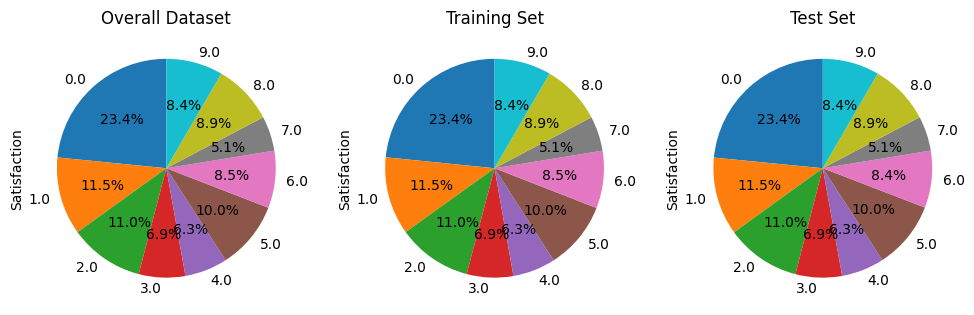

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

s_train = pd.DataFrame(y_train, columns=['Satisfaction'])
s_test = pd.DataFrame(y_test, columns=['Satisfaction'])

sorted_train = s_train['Satisfaction'].value_counts().sort_index()
sorted_test = s_test['Satisfaction'].value_counts().sort_index()
sorted_data = data['Satisfaction'].value_counts().sort_index()

# Create a pie chart for the overall dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 2)
plt.title('Training Set')
sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 3)
plt.title('Test Set')
sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 1)
plt.title('Overall Dataset')
sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

plt.show()

**Feature Scaling**

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Feature Correlation**

0         1         2         3         4         5         6   \
0   1.000000 -0.060592 -0.045706 -0.048202 -0.095571 -0.081044  0.008552   
1  -0.060592  1.000000  0.613065  0.478298  0.683989  0.655011  0.581746   
2  -0.045706  0.613065  1.000000  0.463448  0.649277  0.657046  0.660545   
3  -0.048202  0.478298  0.463448  1.000000  0.590021  0.553329  0.380810   
4  -0.095571  0.683989  0.649277  0.590021  1.000000  0.803380  0.638749   
5  -0.081044  0.655011  0.657046  0.553329  0.803380  1.000000  0.657007   
6   0.008552  0.581746  0.660545  0.380810  0.638749  0.657007  1.000000   
7   0.070602  0.463741  0.369988  0.249060  0.403094  0.386118  0.454650   
8   0.070833  0.253906  0.235324  0.230409  0.236271  0.228734  0.254216   
9   0.077706 -0.133077 -0.145609 -0.148049 -0.194993 -0.185215 -0.131042   
10  0.043317 -0.071887 -0.048304 -0.015574 -0.075901 -0.068066 -0.057194   
11  0.058301 -0.019905 -0.012475 -0.014885 -0.040602 -0.019963 -0.035401   
12  0.178598  0.085375  0.067211  0.103088  0.083018  0.072341  0.066229   
13 -0.353053  0.126561  0.125988  0.056037  0.206417  0.184570  0.140529   
14  0.020718  0.021197  0.111667  0.073976  0.042096  0.085305  0.119465   
15  0.022286 -0.106987 -0.138238 -0.101515 -0.068237 -0.102353 -0.146995   
16 -0.057312  0.152893  0.097009  0.032971  0.057280  0.038865  0.092652   
17 -0.025238  0.030903 -0.021414  0.032809  0.006025  0.009385 -0.014594   
18 -0.016172 -0.032341  0.012469 -0.033897 -0.026836 -0.019138  0.004874   

          7         8         9         10        11        12        13  \
0   0.070602  0.070833  0.077706  0.043317  0.058301  0.178598 -0.353053   
1   0.463741  0.253906 -0.133077 -0.071887 -0.019905  0.085375  0.126561   
2   0.369988  0.235324 -0.145609 -0.048304 -0.012475  0.067211  0.125988   
3   0.249060  0.230409 -0.148049 -0.015574 -0.014885  0.103088  0.056037   
4   0.403094  0.236271 -0.194993 -0.075901 -0.040602  0.083018  0.206417   
5   0.386118  0.228734 -0.185215 -0.068066 -0.019963  0.072341  0.184570   
6   0.454650  0.254216 -0.131042 -0.057194 -0.035401  0.066229  0.140529   
7   1.000000  0.309410 -0.080460  0.036725  0.016366  0.073711 -0.056323   
8   0.309410  1.000000 -0.058464  0.000389  0.028611  0.004317  0.027657   
9  -0.080460 -0.058464  1.000000 -0.277200 -0.154156 -0.258714 -0.231846   
10  0.036725  0.000389 -0.277200  1.000000 -0.208234 -0.349471 -0.313178   
11  0.016366  0.028611 -0.154156 -0.208234  1.000000 -0.194347 -0.174163   
12  0.073711  0.004317 -0.258714 -0.349471 -0.194347  1.000000 -0.292292   
13 -0.056323  0.027657 -0.231846 -0.313178 -0.174163 -0.292292  1.000000   
14  0.024743  0.077226  0.141255  0.021259 -0.078381 -0.150796  0.064814   
15 -0.040232 -0.077504 -0.110704 -0.003495  0.107870  0.112633 -0.094280   
16  0.057812 -0.004563 -0.018864 -0.035930 -0.030513 -0.011181  0.091743   
17 -0.016290  0.012930 -0.021710  0.001774 -0.035345  0.056483 -0.015225   
18 -0.014716  0.001257 -0.010535 -0.014231 -0.007914  0.040720 -0.011902   

          14        15        16        17        18  
0   0.020718  0.022286 -0.057312 -0.025238 -0.016172  
1   0.021197 -0.106987  0.152893  0.030903 -0.032341  
2   0.111667 -0.138238  0.097009 -0.021414  0.012469  
3   0.073976 -0.101515  0.032971  0.032809 -0.033897  
4   0.042096 -0.068237  0.057280  0.006025 -0.026836  
5   0.085305 -0.102353  0.038865  0.009385 -0.019138  
6   0.119465 -0.146995  0.092652 -0.014594  0.004874  
7   0.024743 -0.040232  0.057812 -0.016290 -0.014716  
8   0.077226 -0.077504 -0.004563  0.012930  0.001257  
9   0.141255 -0.110704 -0.018864 -0.021710 -0.010535  
10  0.021259 -0.003495 -0.035930  0.001774 -0.014231  
11 -0.078381  0.107870 -0.030513 -0.035345 -0.007914  
12 -0.150796  0.112633 -0.011181  0.056483  0.040720  
13  0.064814 -0.094280  0.091743 -0.015225 -0.011902  
14  1.000000 -0.737047 -0.169542 -0.211600 -0.015993  
15 -0.737047  1.000000 -0.264226 -0.329772 -0.024925  
16 -0.169542 -0.264226  1.000000 

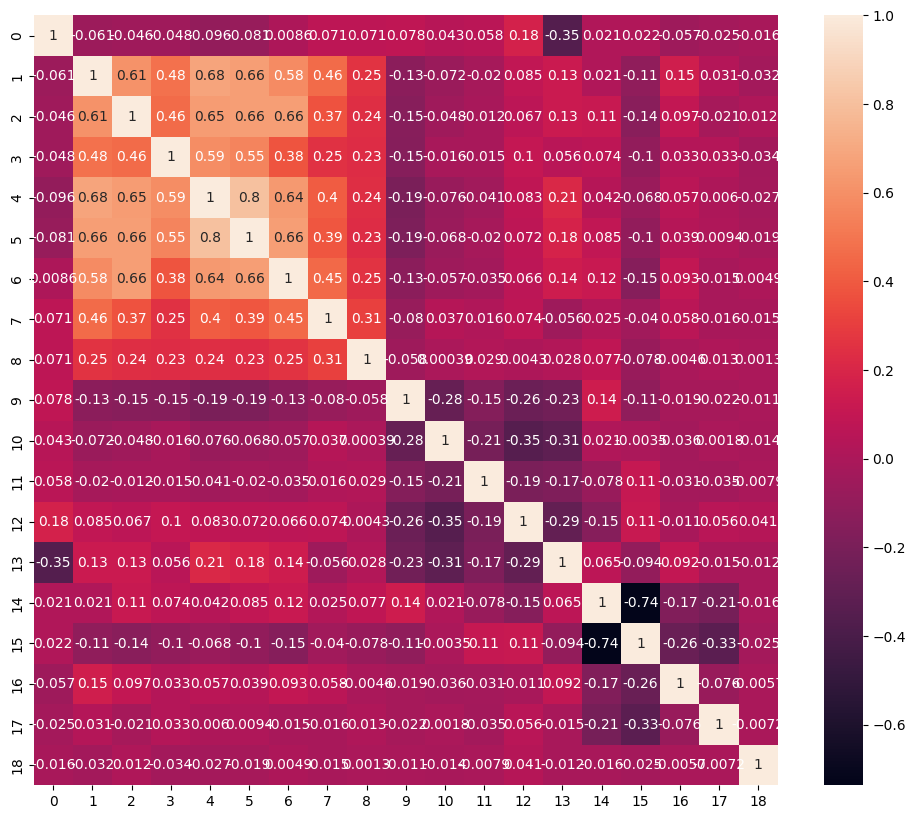

In [144]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

correlation_matrix = pd.DataFrame(x_train).corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True ,ax=ax)
correlation_matrix

In [145]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = pd.DataFrame(dataset, columns=col).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [146]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

x_train = x_train.drop(x_train.columns[to_drop], axis=1)
x_test = x_test.drop(x_test.columns[to_drop], axis=1)

[]


# Default Model

#### Developing the MultiLayer Perceptron Model

In [147]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.2297 - accuracy: 0.2319
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1145 - accuracy: 0.2503
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9087 - accuracy: 0.3227
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7454 - accuracy: 0.3405
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6524 - accuracy: 0.3422
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5944 - accuracy: 0.3573
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5508 - accuracy: 0.3816
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5113 - accuracy: 0.4157
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4772 - accuracy: 0.4211
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4489 - accuracy: 0.4357
Epoch 11/

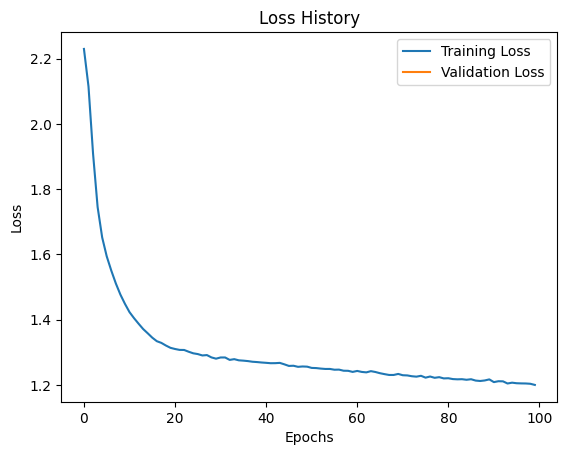

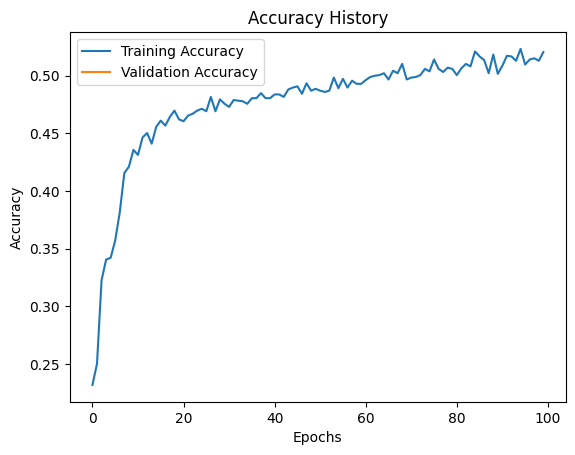

58/58 [==============================] - 0s 2ms/step - loss: 1.1900 - accuracy: 0.5130

Test Accuracy	: 0.45218801498413086
Train Accuracy	: 0.5129729509353638


In [148]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [149]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 2ms/step


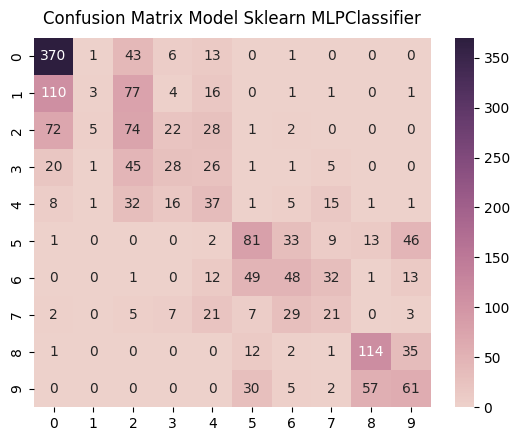

precision    recall  f1-score      support
0.0            0.633562  0.852535  0.726916   434.000000
1.0            0.272727  0.014085  0.026786   213.000000
2.0            0.267148  0.362745  0.307692   204.000000
3.0            0.337349  0.220472  0.266667   127.000000
4.0            0.238710  0.316239  0.272059   117.000000
5.0            0.445055  0.437838  0.441417   185.000000
6.0            0.377953  0.307692  0.339223   156.000000
7.0            0.244186  0.221053  0.232044    95.000000
8.0            0.612903  0.690909  0.649573   165.000000
9.0            0.381250  0.393548  0.387302   155.000000
accuracy       0.452188  0.452188  0.452188     0.452188
macro avg      0.381084  0.381712  0.364968  1851.000000
weighted avg   0.423038  0.452188  0.417877  1851.000000

In [150]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 1ms/step


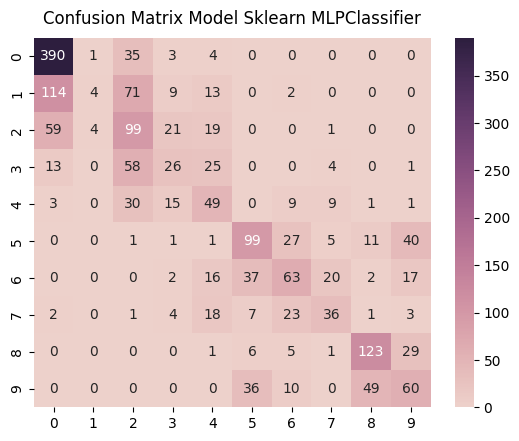

precision    recall  f1-score      support
0.0            0.671256  0.900693  0.769231   433.000000
1.0            0.444444  0.018779  0.036036   213.000000
2.0            0.335593  0.487685  0.397590   203.000000
3.0            0.320988  0.204724  0.250000   127.000000
4.0            0.335616  0.418803  0.372624   117.000000
5.0            0.535135  0.535135  0.535135   185.000000
6.0            0.453237  0.401274  0.425676   157.000000
7.0            0.473684  0.378947  0.421053    95.000000
8.0            0.657754  0.745455  0.698864   165.000000
9.0            0.397351  0.387097  0.392157   155.000000
accuracy       0.512973  0.512973  0.512973     0.512973
macro avg      0.462506  0.447859  0.429836  1850.000000
weighted avg   0.496625  0.512973  0.474994  1850.000000

In [151]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

# Experiments

(Best Train Accuracy is on One Hidden Layer using Experiment 4, while Best Test Accuracy is on Three Hidden Layer using Experiment 16/32/64)

# One Hidden Layer

(Check experiment 4 which has the best Train Accuracy, and experiment 2 for the best Test Accuracy)

## Experiment 1 | 8 Unit

#### Developing the MultiLayer Perceptron Model

In [152]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(8, input_shape=[self.input_shape], activation=self.activation_function))
        #self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function))
        #self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.2085 - accuracy: 0.1654
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1094 - accuracy: 0.2411
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 2.0369 - accuracy: 0.2481
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9809 - accuracy: 0.2584
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9342 - accuracy: 0.2714
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8924 - accuracy: 0.2973
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8539 - accuracy: 0.3195
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8185 - accuracy: 0.3330
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7853 - accuracy: 0.3389
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7551 - accuracy: 0.3411
Epoch 11/

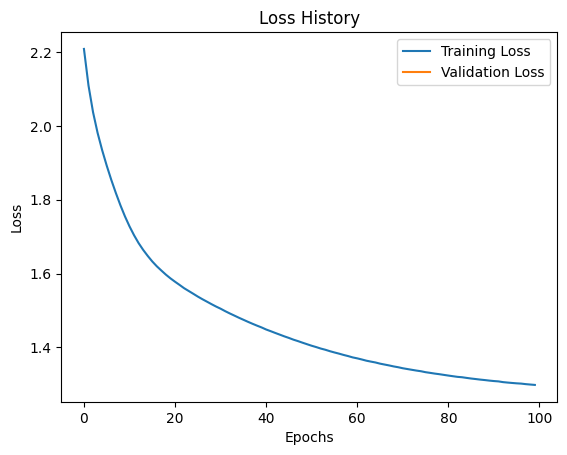

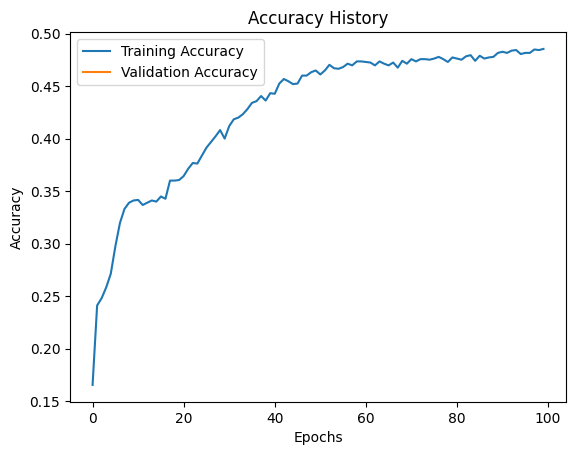

58/58 [==============================] - 0s 2ms/step - loss: 1.2961 - accuracy: 0.4859

Test Accuracy	: 0.4376012980937958
Train Accuracy	: 0.4859459400177002


In [153]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [154]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


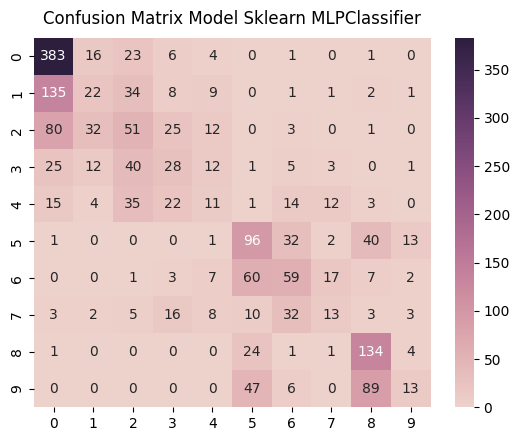

precision    recall  f1-score      support
0.0            0.595645  0.882488  0.711235   434.000000
1.0            0.250000  0.103286  0.146179   213.000000
2.0            0.269841  0.250000  0.259542   204.000000
3.0            0.259259  0.220472  0.238298   127.000000
4.0            0.171875  0.094017  0.121547   117.000000
5.0            0.401674  0.518919  0.452830   185.000000
6.0            0.383117  0.378205  0.380645   156.000000
7.0            0.265306  0.136842  0.180556    95.000000
8.0            0.478571  0.812121  0.602247   165.000000
9.0            0.351351  0.083871  0.135417   155.000000
accuracy       0.437601  0.437601  0.437601     0.437601
macro avg      0.342664  0.348022  0.322850  1851.000000
weighted avg   0.384952  0.437601  0.387850  1851.000000

In [155]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 2ms/step


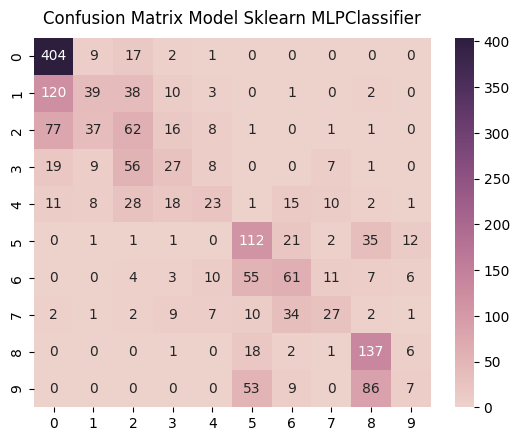

precision    recall  f1-score      support
0.0            0.638231  0.933025  0.757974   433.000000
1.0            0.375000  0.183099  0.246057   213.000000
2.0            0.298077  0.305419  0.301703   203.000000
3.0            0.310345  0.212598  0.252336   127.000000
4.0            0.383333  0.196581  0.259887   117.000000
5.0            0.448000  0.605405  0.514943   185.000000
6.0            0.426573  0.388535  0.406667   157.000000
7.0            0.457627  0.284211  0.350649    95.000000
8.0            0.501832  0.830303  0.625571   165.000000
9.0            0.212121  0.045161  0.074468   155.000000
accuracy       0.485946  0.485946  0.485946     0.485946
macro avg      0.405114  0.398434  0.379025  1850.000000
weighted avg   0.437843  0.485946  0.438647  1850.000000

In [156]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## Experiment 2 | 16 Unit (Test Accuracy 0.4554294943809509)

#### Developing the MultiLayer Perceptron Model

In [157]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(16, input_shape=[self.input_shape], activation=self.activation_function))
        #self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function))
        #self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.3467 - accuracy: 0.0676
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1325 - accuracy: 0.1789
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 2.0125 - accuracy: 0.2535
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9271 - accuracy: 0.2995
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8581 - accuracy: 0.3324
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8005 - accuracy: 0.3503
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7527 - accuracy: 0.3546
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7140 - accuracy: 0.3643
Epoch 9/100
58/58 [==============================] - 0s 2ms/step - loss: 1.6813 - accuracy: 0.3708
Epoch 10/100
58/58 [==============================] - 0s 2ms/step - loss: 1.6540 - accuracy: 0.3741
Epoch 11/

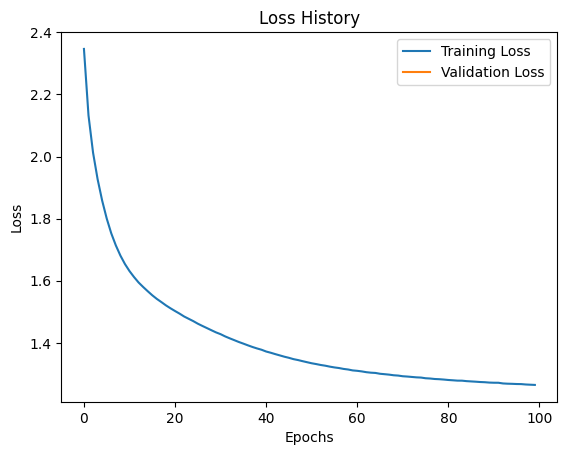

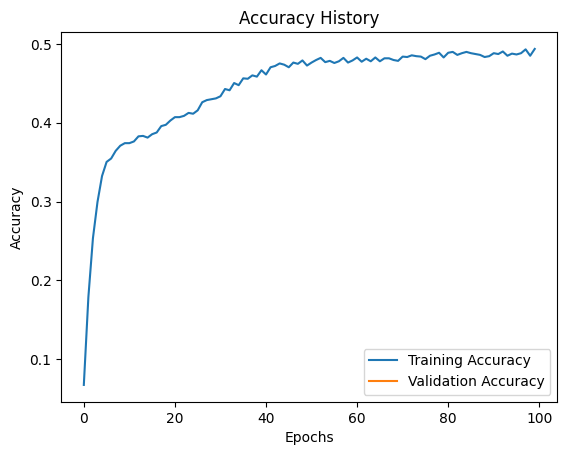

58/58 [==============================] - 0s 2ms/step - loss: 1.2611 - accuracy: 0.4946

Test Accuracy	: 0.4554294943809509
Train Accuracy	: 0.49459460377693176


In [158]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [159]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


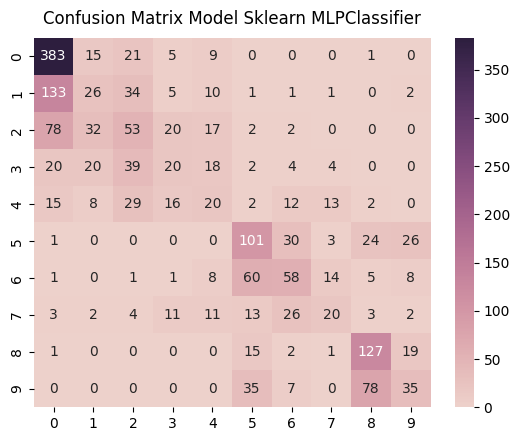

precision    recall  f1-score      support
0.0            0.603150  0.882488  0.716558   434.000000
1.0            0.252427  0.122066  0.164557   213.000000
2.0            0.292818  0.259804  0.275325   204.000000
3.0            0.256410  0.157480  0.195122   127.000000
4.0            0.215054  0.170940  0.190476   117.000000
5.0            0.437229  0.545946  0.485577   185.000000
6.0            0.408451  0.371795  0.389262   156.000000
7.0            0.357143  0.210526  0.264901    95.000000
8.0            0.529167  0.769697  0.627160   165.000000
9.0            0.380435  0.225806  0.283401   155.000000
accuracy       0.455429  0.455429  0.455429     0.455429
macro avg      0.373228  0.371655  0.359234  1851.000000
weighted avg   0.409405  0.455429  0.417288  1851.000000

In [160]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 1ms/step


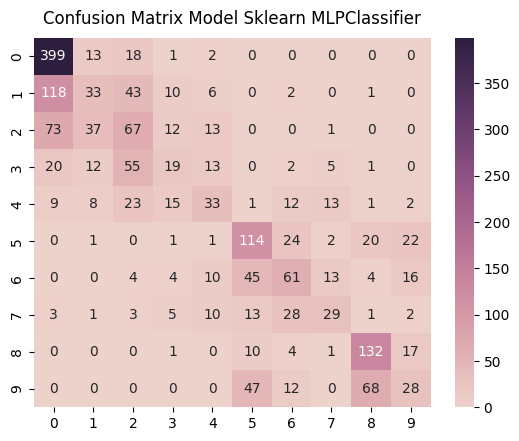

precision    recall  f1-score      support
0.0            0.641479  0.921478  0.756398   433.000000
1.0            0.314286  0.154930  0.207547   213.000000
2.0            0.314554  0.330049  0.322115   203.000000
3.0            0.279412  0.149606  0.194872   127.000000
4.0            0.375000  0.282051  0.321951   117.000000
5.0            0.495652  0.616216  0.549398   185.000000
6.0            0.420690  0.388535  0.403974   157.000000
7.0            0.453125  0.305263  0.364780    95.000000
8.0            0.578947  0.800000  0.671756   165.000000
9.0            0.321839  0.180645  0.231405   155.000000
accuracy       0.494595  0.494595  0.494595     0.494595
macro avg      0.419498  0.412877  0.402420  1850.000000
weighted avg   0.450876  0.494595  0.457275  1850.000000

In [161]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## Experiment 3 | 32 Unit

#### Developing the MultiLayer Perceptron Model

In [162]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(32, input_shape=[self.input_shape], activation=self.activation_function))
        #self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function))
        #self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 4ms/step - loss: 2.4205 - accuracy: 0.0778
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 2.0934 - accuracy: 0.2535
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9493 - accuracy: 0.3141
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8477 - accuracy: 0.3368
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 1.7682 - accuracy: 0.3476
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7066 - accuracy: 0.3530
Epoch 7/100
58/58 [==============================] - 0s 4ms/step - loss: 1.6578 - accuracy: 0.3659
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6208 - accuracy: 0.3789
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5901 - accuracy: 0.3865
Epoch 10/100
58/58 [==============================] - 0s 4ms/step - loss: 1.5649 - accuracy: 0.3919
Epoch 11/

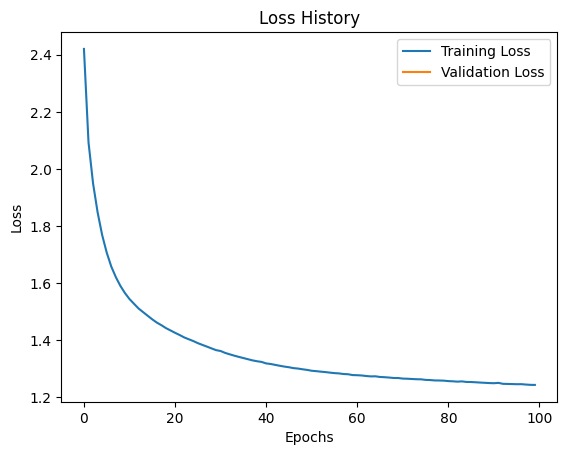

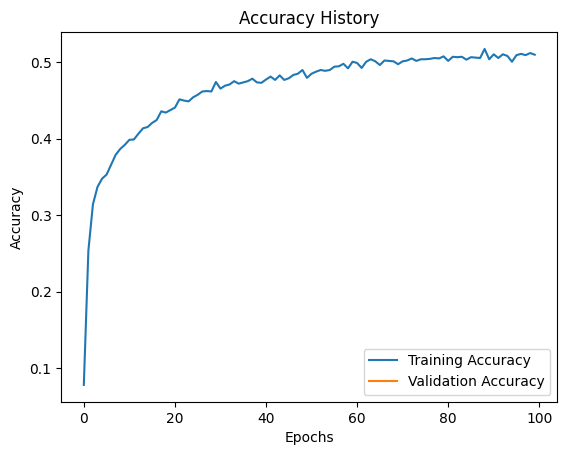

58/58 [==============================] - 0s 2ms/step - loss: 1.2377 - accuracy: 0.5173

Test Accuracy	: 0.4527282416820526
Train Accuracy	: 0.5172972679138184


In [163]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [164]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


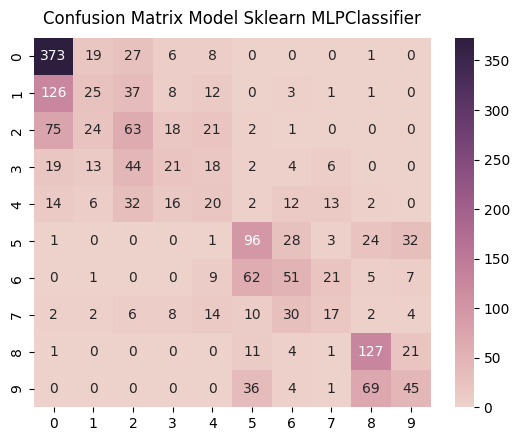

precision    recall  f1-score      support
0.0            0.610475  0.859447  0.713876   434.000000
1.0            0.277778  0.117371  0.165017   213.000000
2.0            0.301435  0.308824  0.305085   204.000000
3.0            0.272727  0.165354  0.205882   127.000000
4.0            0.194175  0.170940  0.181818   117.000000
5.0            0.434389  0.518919  0.472906   185.000000
6.0            0.372263  0.326923  0.348123   156.000000
7.0            0.269841  0.178947  0.215190    95.000000
8.0            0.549784  0.769697  0.641414   165.000000
9.0            0.412844  0.290323  0.340909   155.000000
accuracy       0.452728  0.452728  0.452728     0.452728
macro avg      0.369571  0.370674  0.359022  1851.000000
weighted avg   0.411526  0.452728  0.418984  1851.000000

In [165]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 1ms/step


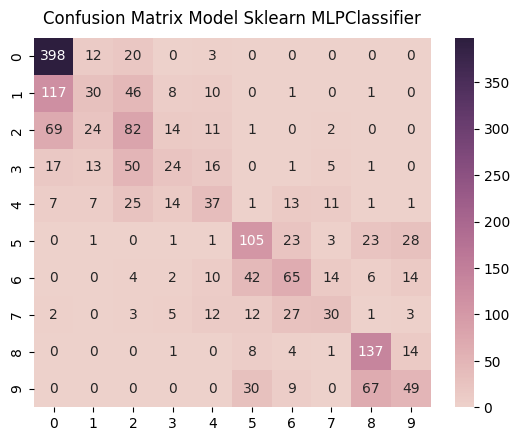

precision    recall  f1-score      support
0.0            0.652459  0.919169  0.763183   433.000000
1.0            0.344828  0.140845  0.200000   213.000000
2.0            0.356522  0.403941  0.378753   203.000000
3.0            0.347826  0.188976  0.244898   127.000000
4.0            0.370000  0.316239  0.341014   117.000000
5.0            0.527638  0.567568  0.546875   185.000000
6.0            0.454545  0.414013  0.433333   157.000000
7.0            0.454545  0.315789  0.372671    95.000000
8.0            0.578059  0.830303  0.681592   165.000000
9.0            0.449541  0.316129  0.371212   155.000000
accuracy       0.517297  0.517297  0.517297     0.517297
macro avg      0.453596  0.441297  0.433353  1850.000000
weighted avg   0.482712  0.517297  0.484084  1850.000000

In [166]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## Experiment 4 | 64 Unit (Train Accuracy 0.5248648524284363)

#### Developing the MultiLayer Perceptron Model

In [167]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(64, input_shape=[self.input_shape], activation=self.activation_function))
        #self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function))
       # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.1945 - accuracy: 0.2173
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9720 - accuracy: 0.2978
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 1.8331 - accuracy: 0.3281
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7282 - accuracy: 0.3508
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 1.6531 - accuracy: 0.3843
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 1.6010 - accuracy: 0.3935
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 1.5600 - accuracy: 0.4011
Epoch 8/100
58/58 [==============================] - 0s 2ms/step - loss: 1.5282 - accuracy: 0.4157
Epoch 9/100
58/58 [==============================] - 0s 2ms/step - loss: 1.5008 - accuracy: 0.4259
Epoch 10/100
58/58 [==============================] - 0s 2ms/step - loss: 1.4789 - accuracy: 0.4297
Epoch 11/

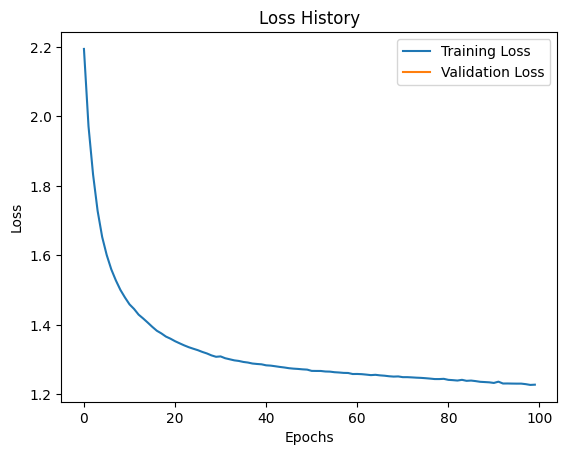

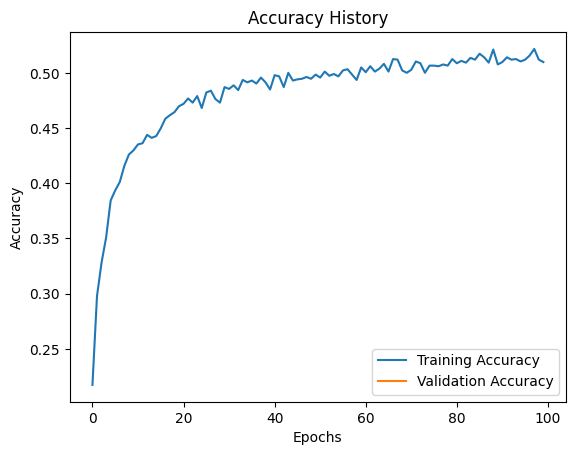

58/58 [==============================] - 0s 2ms/step - loss: 1.2199 - accuracy: 0.5249

Test Accuracy	: 0.4489465057849884
Train Accuracy	: 0.5248648524284363


In [168]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [169]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


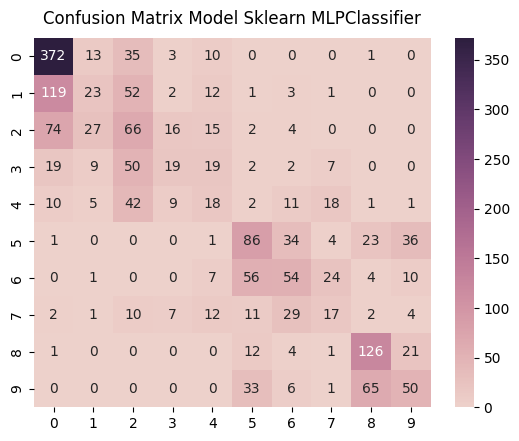

precision    recall  f1-score      support
0.0            0.622074  0.857143  0.720930   434.000000
1.0            0.291139  0.107981  0.157534   213.000000
2.0            0.258824  0.323529  0.287582   204.000000
3.0            0.339286  0.149606  0.207650   127.000000
4.0            0.191489  0.153846  0.170616   117.000000
5.0            0.419512  0.464865  0.441026   185.000000
6.0            0.367347  0.346154  0.356436   156.000000
7.0            0.232877  0.178947  0.202381    95.000000
8.0            0.567568  0.763636  0.651163   165.000000
9.0            0.409836  0.322581  0.361011   155.000000
accuracy       0.448947  0.448947  0.448947     0.448947
macro avg      0.369995  0.366829  0.355633  1851.000000
weighted avg   0.413019  0.448947  0.416671  1851.000000

In [170]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 1ms/step


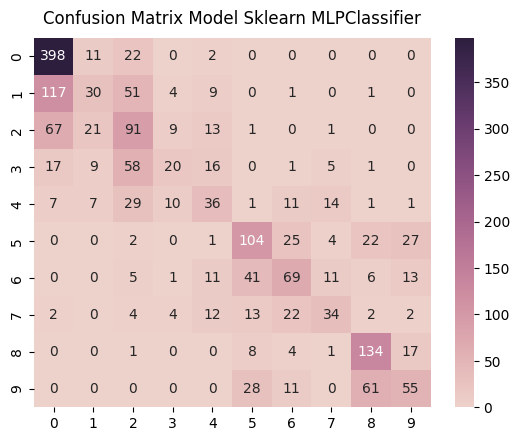

precision    recall  f1-score      support
0.0            0.654605  0.919169  0.764649   433.000000
1.0            0.384615  0.140845  0.206186   213.000000
2.0            0.346008  0.448276  0.390558   203.000000
3.0            0.416667  0.157480  0.228571   127.000000
4.0            0.360000  0.307692  0.331797   117.000000
5.0            0.530612  0.562162  0.545932   185.000000
6.0            0.479167  0.439490  0.458472   157.000000
7.0            0.485714  0.357895  0.412121    95.000000
8.0            0.587719  0.812121  0.681934   165.000000
9.0            0.478261  0.354839  0.407407   155.000000
accuracy       0.524865  0.524865  0.524865     0.524865
macro avg      0.472337  0.449997  0.442763  1850.000000
weighted avg   0.497991  0.524865  0.491859  1850.000000

In [171]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## Experiment 5 | 128 Unit

#### Developing the MultiLayer Perceptron Model

In [172]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function))
      #  self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function))
      #  self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.0825 - accuracy: 0.2714
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8345 - accuracy: 0.3432
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7010 - accuracy: 0.3735
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 1.6103 - accuracy: 0.3843
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5477 - accuracy: 0.4086
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5072 - accuracy: 0.4178
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4764 - accuracy: 0.4119
Epoch 8/100
58/58 [==============================] - 0s 2ms/step - loss: 1.4477 - accuracy: 0.4422
Epoch 9/100
58/58 [==============================] - 0s 2ms/step - loss: 1.4247 - accuracy: 0.4400
Epoch 10/100
58/58 [==============================] - 0s 2ms/step - loss: 1.4070 - accuracy: 0.4373
Epoch 11/

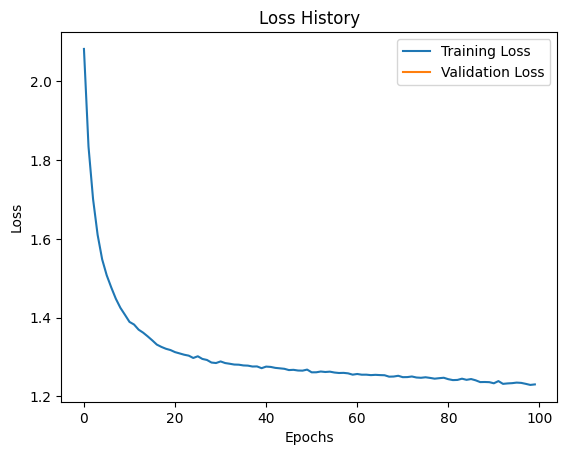

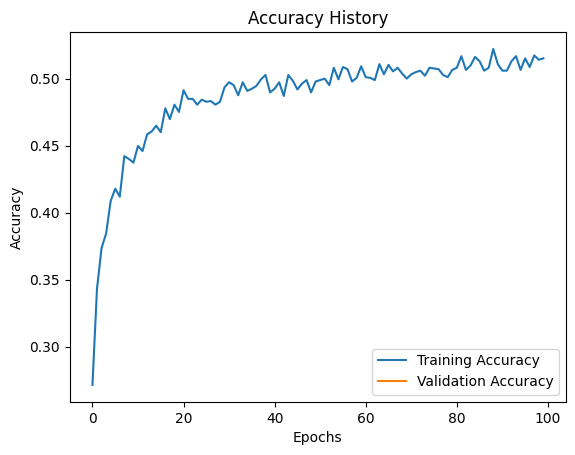

58/58 [==============================] - 0s 2ms/step - loss: 1.2217 - accuracy: 0.5222

Test Accuracy	: 0.4451647698879242
Train Accuracy	: 0.522162139415741


In [173]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [174]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


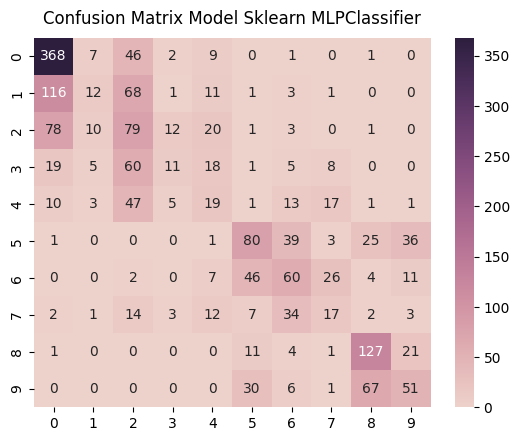

precision    recall  f1-score      support
0.0            0.618487  0.847926  0.715258   434.000000
1.0            0.315789  0.056338  0.095618   213.000000
2.0            0.250000  0.387255  0.303846   204.000000
3.0            0.323529  0.086614  0.136646   127.000000
4.0            0.195876  0.162393  0.177570   117.000000
5.0            0.449438  0.432432  0.440771   185.000000
6.0            0.357143  0.384615  0.370370   156.000000
7.0            0.229730  0.178947  0.201183    95.000000
8.0            0.557018  0.769697  0.646310   165.000000
9.0            0.414634  0.329032  0.366906   155.000000
accuracy       0.445165  0.445165  0.445165     0.445165
macro avg      0.371165  0.363525  0.345448  1851.000000
weighted avg   0.414670  0.445165  0.406725  1851.000000

In [175]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 1ms/step


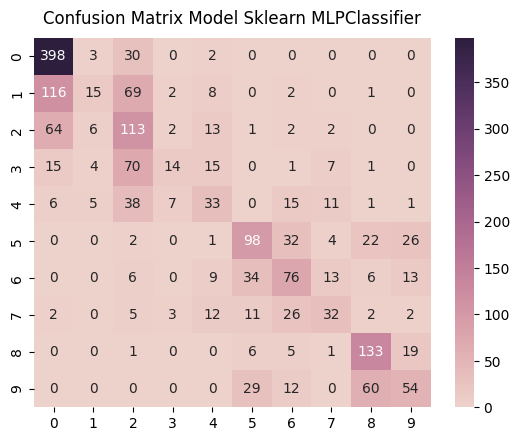

precision    recall  f1-score      support
0.0            0.662230  0.919169  0.769826   433.000000
1.0            0.454545  0.070423  0.121951   213.000000
2.0            0.338323  0.556650  0.420857   203.000000
3.0            0.500000  0.110236  0.180645   127.000000
4.0            0.354839  0.282051  0.314286   117.000000
5.0            0.547486  0.529730  0.538462   185.000000
6.0            0.444444  0.484076  0.463415   157.000000
7.0            0.457143  0.336842  0.387879    95.000000
8.0            0.588496  0.806061  0.680307   165.000000
9.0            0.469565  0.348387  0.400000   155.000000
accuracy       0.522162  0.522162  0.522162     0.522162
macro avg      0.481707  0.444362  0.427763  1850.000000
weighted avg   0.508992  0.522162  0.479961  1850.000000

In [176]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

# Two Hidden Layer

(Check experiment 6 which has the best Train Accuracy, and experiment 3 for the best Test Accuracy)

## Experiment 1 | 32/64 Unit

#### Developing the MultiLayer Perceptron Model

In [177]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(32, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function))
        #self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 4ms/step - loss: 2.2078 - accuracy: 0.2238
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 2.0956 - accuracy: 0.2400
Epoch 3/100
58/58 [==============================] - 0s 4ms/step - loss: 1.9502 - accuracy: 0.3330
Epoch 4/100
58/58 [==============================] - 0s 4ms/step - loss: 1.7864 - accuracy: 0.3351
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 1.6733 - accuracy: 0.3443
Epoch 6/100
58/58 [==============================] - 0s 4ms/step - loss: 1.6100 - accuracy: 0.3568
Epoch 7/100
58/58 [==============================] - 0s 4ms/step - loss: 1.5704 - accuracy: 0.3611
Epoch 8/100
58/58 [==============================] - 0s 4ms/step - loss: 1.5404 - accuracy: 0.3773
Epoch 9/100
58/58 [==============================] - 0s 4ms/step - loss: 1.5152 - accuracy: 0.4005
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4952 - accuracy: 0.4097
Epoch 11/

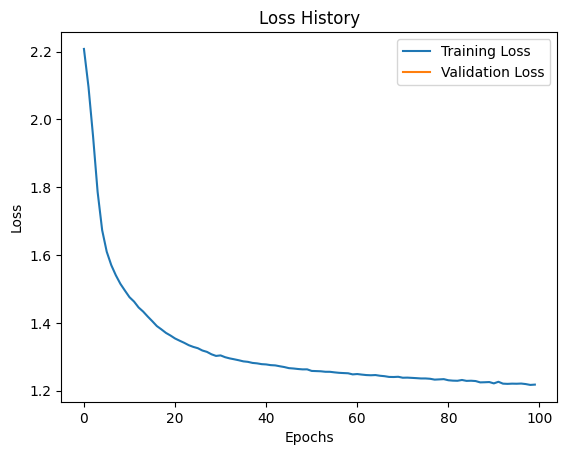

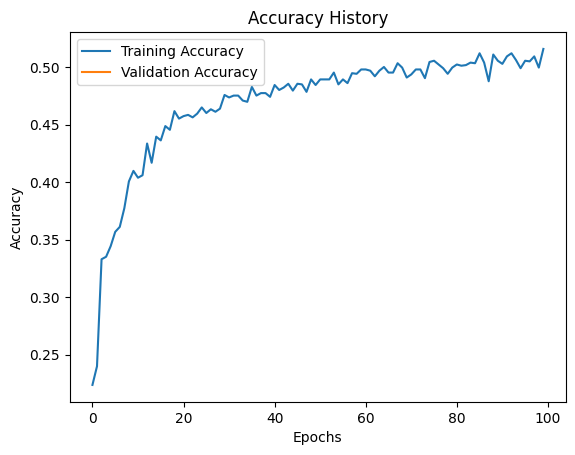

58/58 [==============================] - 0s 2ms/step - loss: 1.2094 - accuracy: 0.5141

Test Accuracy	: 0.44840627908706665
Train Accuracy	: 0.5140540599822998


In [178]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [179]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


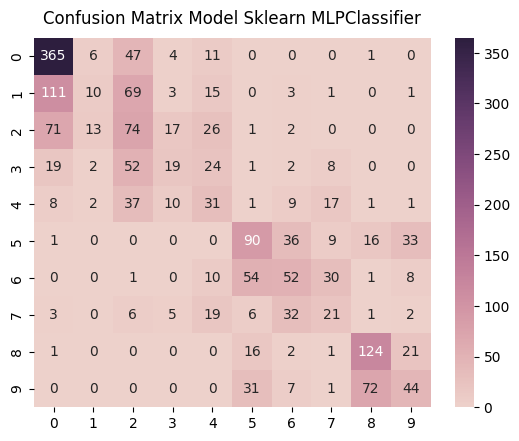

precision    recall  f1-score      support
0.0            0.630397  0.841014  0.720632   434.000000
1.0            0.303030  0.046948  0.081301   213.000000
2.0            0.258741  0.362745  0.302041   204.000000
3.0            0.327586  0.149606  0.205405   127.000000
4.0            0.227941  0.264957  0.245059   117.000000
5.0            0.450000  0.486486  0.467532   185.000000
6.0            0.358621  0.333333  0.345515   156.000000
7.0            0.238636  0.221053  0.229508    95.000000
8.0            0.574074  0.751515  0.650919   165.000000
9.0            0.400000  0.283871  0.332075   155.000000
accuracy       0.448406  0.448406  0.448406     0.448406
macro avg      0.376903  0.374153  0.357999  1851.000000
weighted avg   0.420195  0.448406  0.414650  1851.000000

In [180]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 1ms/step


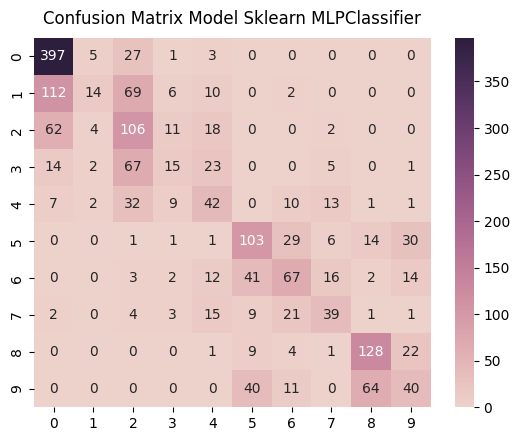

precision    recall  f1-score      support
0.0            0.668350  0.916859  0.773126   433.000000
1.0            0.518519  0.065728  0.116667   213.000000
2.0            0.343042  0.522167  0.414062   203.000000
3.0            0.312500  0.118110  0.171429   127.000000
4.0            0.336000  0.358974  0.347107   117.000000
5.0            0.509901  0.556757  0.532300   185.000000
6.0            0.465278  0.426752  0.445183   157.000000
7.0            0.475610  0.410526  0.440678    95.000000
8.0            0.609524  0.775758  0.682667   165.000000
9.0            0.366972  0.258065  0.303030   155.000000
accuracy       0.514054  0.514054  0.514054     0.514054
macro avg      0.460570  0.440970  0.422625  1850.000000
weighted avg   0.496482  0.514054  0.473456  1850.000000

In [181]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## Experiment 2 | 32/128 Unit

#### Developing the MultiLayer Perceptron Model

In [182]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(32, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(128, activation=self.activation_function))
       # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.2076 - accuracy: 0.2168
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.0626 - accuracy: 0.2546
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8771 - accuracy: 0.3551
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7092 - accuracy: 0.3400
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6123 - accuracy: 0.3627
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5619 - accuracy: 0.3757
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5304 - accuracy: 0.3843
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5010 - accuracy: 0.4027
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4774 - accuracy: 0.4135
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4582 - accuracy: 0.4146
Epoch 11/

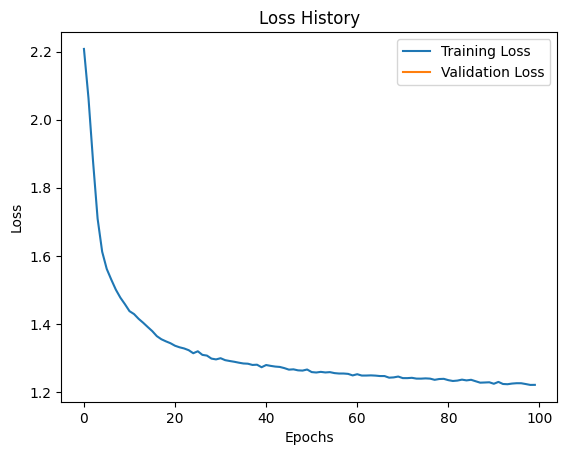

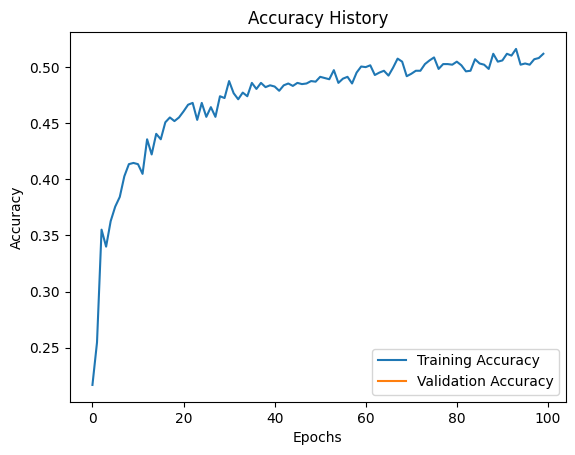

58/58 [==============================] - 0s 2ms/step - loss: 1.2146 - accuracy: 0.5097

Test Accuracy	: 0.4440842866897583
Train Accuracy	: 0.5097297430038452


In [183]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [184]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


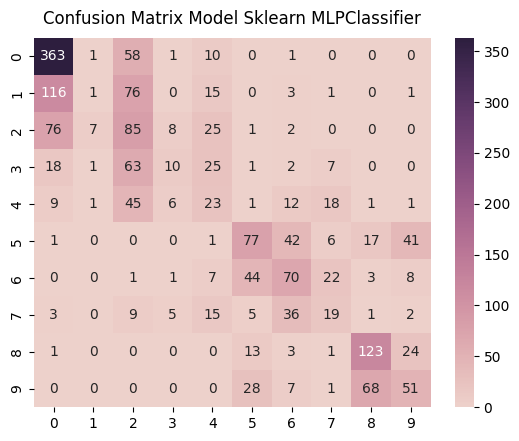

precision    recall  f1-score      support
0.0            0.618399  0.836406  0.711068   434.000000
1.0            0.090909  0.004695  0.008929   213.000000
2.0            0.252226  0.416667  0.314233   204.000000
3.0            0.322581  0.078740  0.126582   127.000000
4.0            0.190083  0.196581  0.193277   117.000000
5.0            0.452941  0.416216  0.433803   185.000000
6.0            0.393258  0.448718  0.419162   156.000000
7.0            0.253333  0.200000  0.223529    95.000000
8.0            0.577465  0.745455  0.650794   165.000000
9.0            0.398438  0.329032  0.360424   155.000000
accuracy       0.444084  0.444084  0.444084     0.444084
macro avg      0.354963  0.367251  0.344180  1851.000000
weighted avg   0.393657  0.444084  0.401633  1851.000000

In [185]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 1ms/step


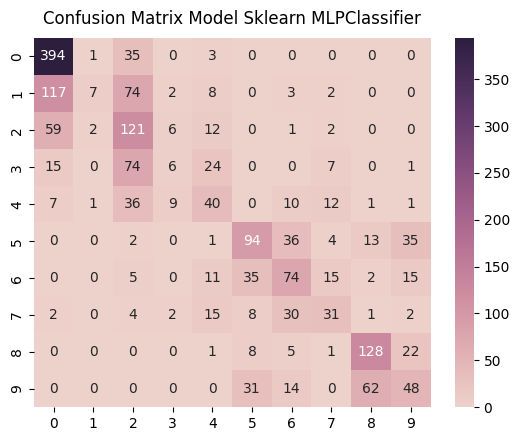

precision    recall  f1-score     support
0.0            0.663300  0.909931  0.767283   433.00000
1.0            0.636364  0.032864  0.062500   213.00000
2.0            0.344729  0.596059  0.436823   203.00000
3.0            0.240000  0.047244  0.078947   127.00000
4.0            0.347826  0.341880  0.344828   117.00000
5.0            0.534091  0.508108  0.520776   185.00000
6.0            0.427746  0.471338  0.448485   157.00000
7.0            0.418919  0.326316  0.366864    95.00000
8.0            0.618357  0.775758  0.688172   165.00000
9.0            0.387097  0.309677  0.344086   155.00000
accuracy       0.509730  0.509730  0.509730     0.50973
macro avg      0.461843  0.431917  0.405876  1850.00000
weighted avg   0.503621  0.509730  0.461125  1850.00000

In [186]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## Experiment 3 | 32/32 Unit (Test Accuracy 0.4548892378807068)

#### Developing the MultiLayer Perceptron Model

In [187]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(32, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))
        #self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.2579 - accuracy: 0.2097
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1359 - accuracy: 0.2341
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 2.0365 - accuracy: 0.2681
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9056 - accuracy: 0.3335
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7874 - accuracy: 0.3335
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7019 - accuracy: 0.3632
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6426 - accuracy: 0.3514
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6021 - accuracy: 0.3816
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5702 - accuracy: 0.3876
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5454 - accuracy: 0.4146
Epoch 11/

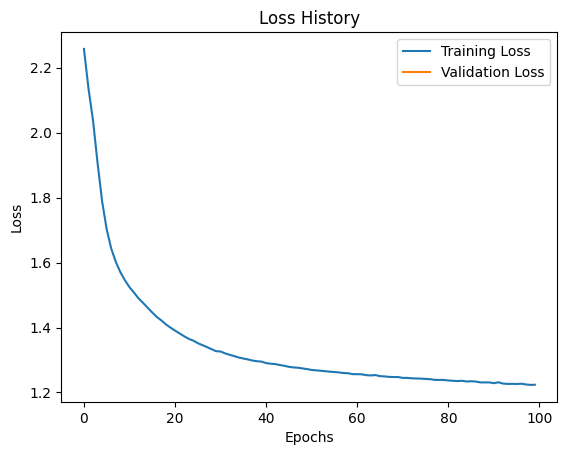

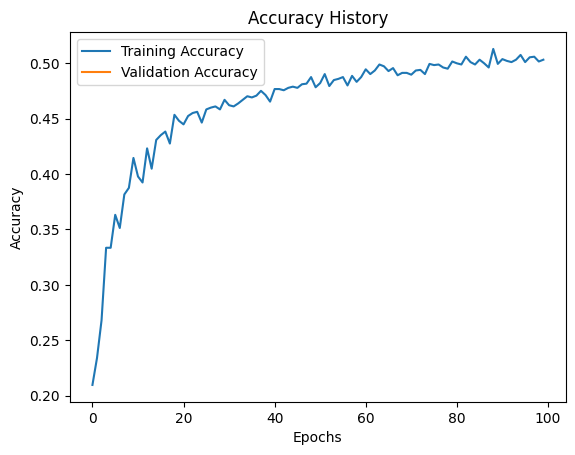

58/58 [==============================] - 0s 2ms/step - loss: 1.2172 - accuracy: 0.5038

Test Accuracy	: 0.4548892378807068
Train Accuracy	: 0.5037837624549866


In [188]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [189]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


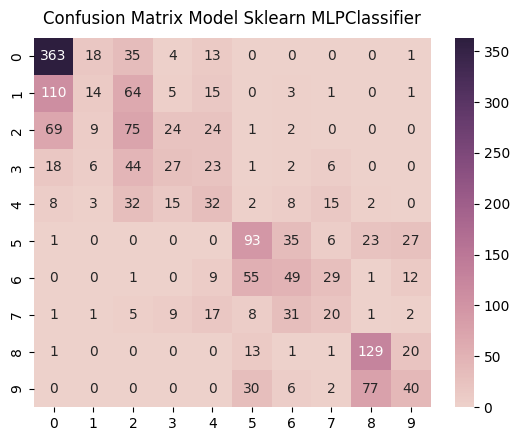

precision    recall  f1-score      support
0.0            0.635727  0.836406  0.722388   434.000000
1.0            0.274510  0.065728  0.106061   213.000000
2.0            0.292969  0.367647  0.326087   204.000000
3.0            0.321429  0.212598  0.255924   127.000000
4.0            0.240602  0.273504  0.256000   117.000000
5.0            0.458128  0.502703  0.479381   185.000000
6.0            0.357664  0.314103  0.334471   156.000000
7.0            0.250000  0.210526  0.228571    95.000000
8.0            0.553648  0.781818  0.648241   165.000000
9.0            0.388350  0.258065  0.310078   155.000000
accuracy       0.454889  0.454889  0.454889     0.454889
macro avg      0.377303  0.382310  0.366720  1851.000000
weighted avg   0.420831  0.454889  0.422843  1851.000000

In [190]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 1ms/step


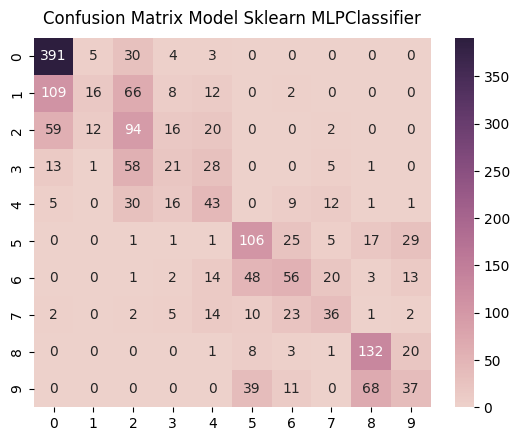

precision    recall  f1-score      support
0.0            0.675302  0.903002  0.772727   433.000000
1.0            0.470588  0.075117  0.129555   213.000000
2.0            0.333333  0.463054  0.387629   203.000000
3.0            0.287671  0.165354  0.210000   127.000000
4.0            0.316176  0.367521  0.339921   117.000000
5.0            0.502370  0.572973  0.535354   185.000000
6.0            0.434109  0.356688  0.391608   157.000000
7.0            0.444444  0.378947  0.409091    95.000000
8.0            0.591928  0.800000  0.680412   165.000000
9.0            0.362745  0.238710  0.287938   155.000000
accuracy       0.503784  0.503784  0.503784     0.503784
macro avg      0.441867  0.432137  0.414423  1850.000000
weighted avg   0.481645  0.503784  0.466811  1850.000000

In [191]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## Experiment 4 | 64/128 Unit

#### Developing the MultiLayer Perceptron Model

In [192]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(64, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(128, activation=self.activation_function))
        #self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.2072 - accuracy: 0.2162
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.0204 - accuracy: 0.2703
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7948 - accuracy: 0.3627
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6389 - accuracy: 0.3514
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5578 - accuracy: 0.3832
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5135 - accuracy: 0.3951
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4841 - accuracy: 0.4043
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4543 - accuracy: 0.4232
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4306 - accuracy: 0.4259
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4114 - accuracy: 0.4368
Epoch 11/

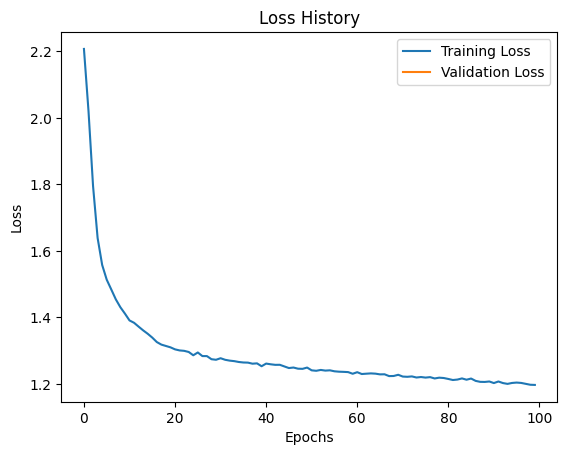

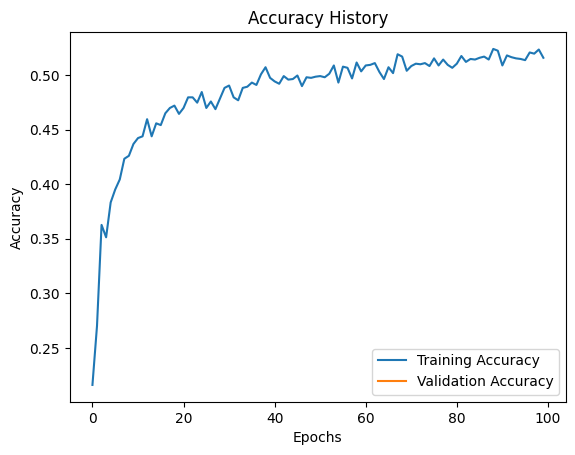

58/58 [==============================] - 0s 3ms/step - loss: 1.1900 - accuracy: 0.5162

Test Accuracy	: 0.4527282416820526
Train Accuracy	: 0.5162162184715271


In [193]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [194]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 2ms/step


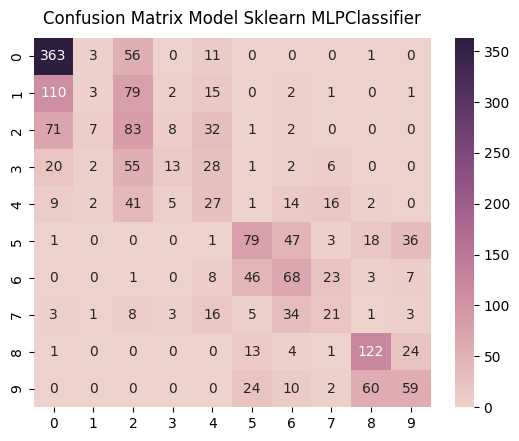

precision    recall  f1-score      support
0.0            0.628028  0.836406  0.717391   434.000000
1.0            0.166667  0.014085  0.025974   213.000000
2.0            0.256966  0.406863  0.314991   204.000000
3.0            0.419355  0.102362  0.164557   127.000000
4.0            0.195652  0.230769  0.211765   117.000000
5.0            0.464706  0.427027  0.445070   185.000000
6.0            0.371585  0.435897  0.401180   156.000000
7.0            0.287671  0.221053  0.250000    95.000000
8.0            0.589372  0.739394  0.655914   165.000000
9.0            0.453846  0.380645  0.414035   155.000000
accuracy       0.452728  0.452728  0.452728     0.452728
macro avg      0.383385  0.379450  0.360088  1851.000000
weighted avg   0.418959  0.452728  0.414850  1851.000000

In [195]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 1ms/step


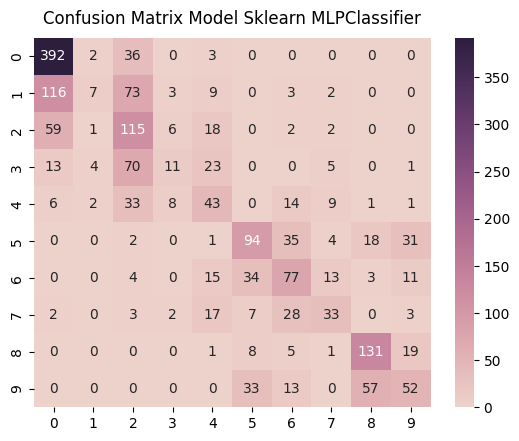

precision    recall  f1-score      support
0.0            0.666667  0.905312  0.767875   433.000000
1.0            0.437500  0.032864  0.061135   213.000000
2.0            0.342262  0.566502  0.426716   203.000000
3.0            0.366667  0.086614  0.140127   127.000000
4.0            0.330769  0.367521  0.348178   117.000000
5.0            0.534091  0.508108  0.520776   185.000000
6.0            0.435028  0.490446  0.461078   157.000000
7.0            0.478261  0.347368  0.402439    95.000000
8.0            0.623810  0.793939  0.698667   165.000000
9.0            0.440678  0.335484  0.380952   155.000000
accuracy       0.516216  0.516216  0.516216     0.516216
macro avg      0.465573  0.443416  0.420794  1850.000000
weighted avg   0.497500  0.516216  0.471330  1850.000000

In [196]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## Experiment 5 | 64/64 Unit

#### Developing the MultiLayer Perceptron Model

In [197]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(64, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function))
        #self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.1964 - accuracy: 0.2216
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.0517 - accuracy: 0.2605
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8601 - accuracy: 0.3422
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6948 - accuracy: 0.3438
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6011 - accuracy: 0.3670
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5498 - accuracy: 0.3919
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5154 - accuracy: 0.3849
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4856 - accuracy: 0.4222
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4606 - accuracy: 0.4249
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4401 - accuracy: 0.4319
Epoch 11/

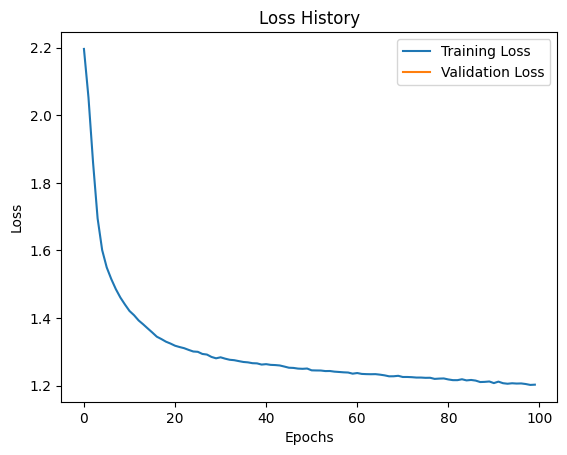

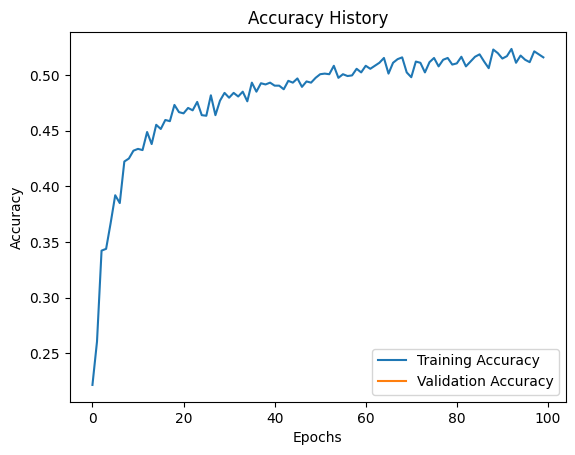

58/58 [==============================] - 0s 3ms/step - loss: 1.1924 - accuracy: 0.5178

Test Accuracy	: 0.4516477584838867
Train Accuracy	: 0.5178378224372864


In [198]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [199]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 2ms/step


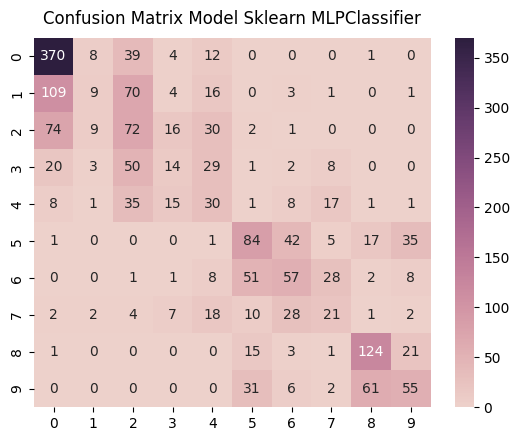

precision    recall  f1-score      support
0.0            0.632479  0.852535  0.726202   434.000000
1.0            0.281250  0.042254  0.073469   213.000000
2.0            0.265683  0.352941  0.303158   204.000000
3.0            0.229508  0.110236  0.148936   127.000000
4.0            0.208333  0.256410  0.229885   117.000000
5.0            0.430769  0.454054  0.442105   185.000000
6.0            0.380000  0.365385  0.372549   156.000000
7.0            0.253012  0.221053  0.235955    95.000000
8.0            0.599034  0.751515  0.666667   165.000000
9.0            0.447154  0.354839  0.395683   155.000000
accuracy       0.451648  0.451648  0.451648     0.451648
macro avg      0.372722  0.376122  0.359461  1851.000000
weighted avg   0.417764  0.451648  0.417142  1851.000000

In [200]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 2ms/step


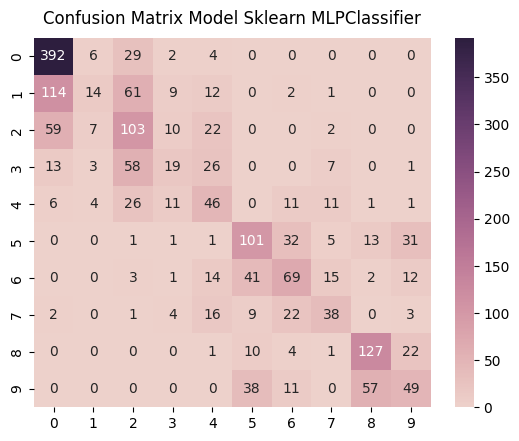

precision    recall  f1-score      support
0.0            0.668942  0.905312  0.769382   433.000000
1.0            0.411765  0.065728  0.113360   213.000000
2.0            0.365248  0.507389  0.424742   203.000000
3.0            0.333333  0.149606  0.206522   127.000000
4.0            0.323944  0.393162  0.355212   117.000000
5.0            0.507538  0.545946  0.526042   185.000000
6.0            0.456954  0.439490  0.448052   157.000000
7.0            0.475000  0.400000  0.434286    95.000000
8.0            0.635000  0.769697  0.695890   165.000000
9.0            0.411765  0.316129  0.357664   155.000000
accuracy       0.517838  0.517838  0.517838     0.517838
macro avg      0.458949  0.449246  0.433115  1850.000000
weighted avg   0.492485  0.517838  0.481339  1850.000000

In [201]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## Experiment 6 | 128/128 Unit (Train Accuracy 0.5243242979049683)

#### Developing the MultiLayer Perceptron Model

In [202]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(128, activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.2210 - accuracy: 0.2341
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.0813 - accuracy: 0.2632
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8347 - accuracy: 0.3319
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6830 - accuracy: 0.3405
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6032 - accuracy: 0.3622
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5525 - accuracy: 0.3686
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5150 - accuracy: 0.3951
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4807 - accuracy: 0.4335
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4528 - accuracy: 0.4297
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.4305 - accuracy: 0.4422
Epoch 11/

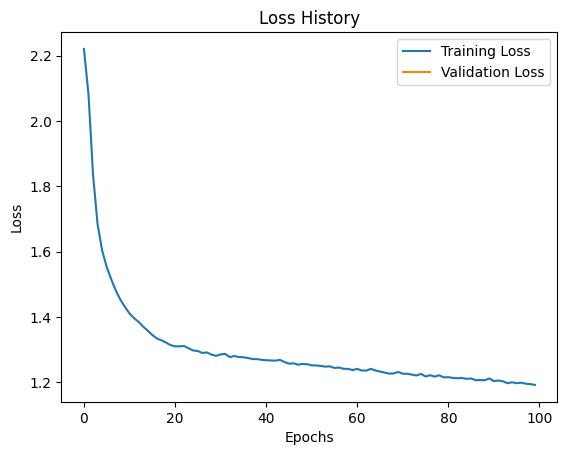

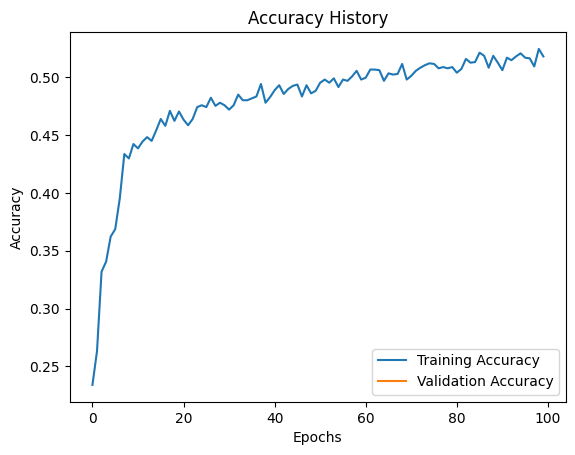

58/58 [==============================] - 0s 2ms/step - loss: 1.1792 - accuracy: 0.5243

Test Accuracy	: 0.45326849818229675
Train Accuracy	: 0.5243242979049683


In [203]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [204]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 2ms/step


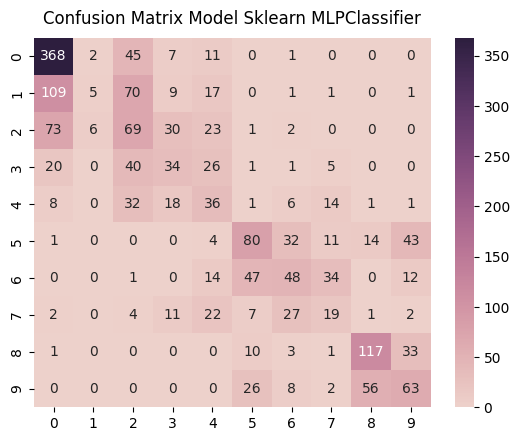

precision    recall  f1-score      support
0.0            0.632302  0.847926  0.724409   434.000000
1.0            0.384615  0.023474  0.044248   213.000000
2.0            0.264368  0.338235  0.296774   204.000000
3.0            0.311927  0.267717  0.288136   127.000000
4.0            0.235294  0.307692  0.266667   117.000000
5.0            0.462428  0.432432  0.446927   185.000000
6.0            0.372093  0.307692  0.336842   156.000000
7.0            0.218391  0.200000  0.208791    95.000000
8.0            0.619048  0.709091  0.661017   165.000000
9.0            0.406452  0.406452  0.406452   155.000000
accuracy       0.453269  0.453269  0.453269     0.453269
macro avg      0.390692  0.384071  0.368026  1851.000000
weighted avg   0.435928  0.453269  0.421008  1851.000000

In [205]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 2ms/step


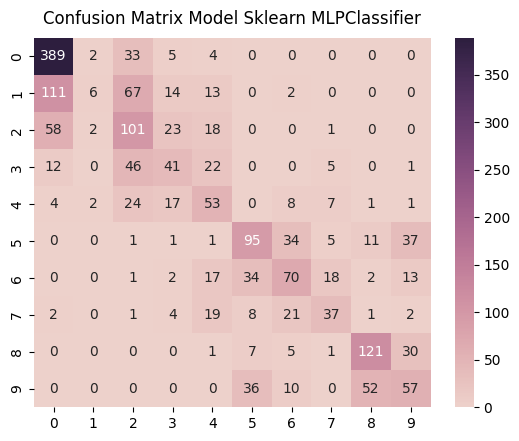

precision    recall  f1-score      support
0.0            0.675347  0.898383  0.771060   433.000000
1.0            0.500000  0.028169  0.053333   213.000000
2.0            0.368613  0.497537  0.423480   203.000000
3.0            0.383178  0.322835  0.350427   127.000000
4.0            0.358108  0.452991  0.400000   117.000000
5.0            0.527778  0.513514  0.520548   185.000000
6.0            0.466667  0.445860  0.456026   157.000000
7.0            0.500000  0.389474  0.437870    95.000000
8.0            0.643617  0.733333  0.685552   165.000000
9.0            0.404255  0.367742  0.385135   155.000000
accuracy       0.524324  0.524324  0.524324     0.524324
macro avg      0.482756  0.464984  0.448343  1850.000000
weighted avg   0.514366  0.524324  0.489085  1850.000000

In [206]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

# Three Hidden Layer

(Check Expriment 128/32/16 for the best Train Accuracy, and Experiment 16/32/64 for best Test Accuracy)

## 8/16/32


#### Developing the MultiLayer Perceptron Model

In [207]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(8, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(16, activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 2s 3ms/step - loss: 2.2826 - accuracy: 0.2189
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.2089 - accuracy: 0.2341
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 2.2034 - accuracy: 0.2341
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1953 - accuracy: 0.2341
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1794 - accuracy: 0.2341
Epoch 6/100
58/58 [==============================] - 0s 4ms/step - loss: 2.1462 - accuracy: 0.2341
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 2.0809 - accuracy: 0.2341
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9820 - accuracy: 0.3005
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8716 - accuracy: 0.3324
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7809 - accuracy: 0.3330
Epoch 11/

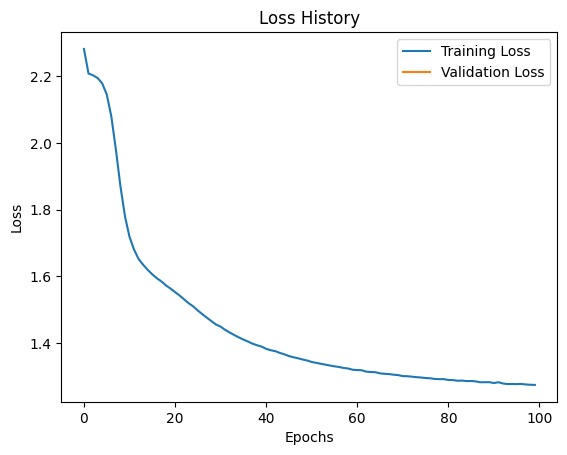

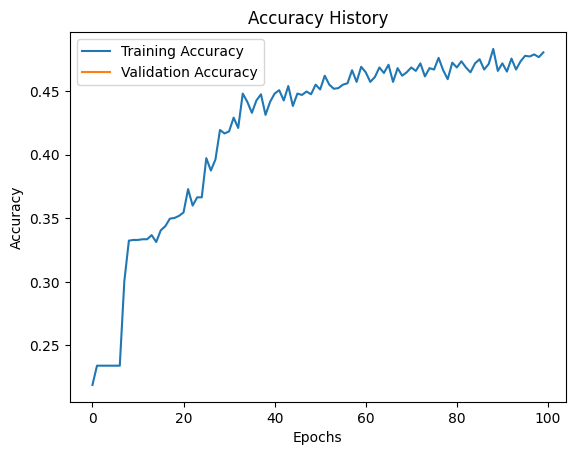

58/58 [==============================] - 0s 2ms/step - loss: 1.2687 - accuracy: 0.4838

Test Accuracy	: 0.45218801498413086
Train Accuracy	: 0.4837837815284729


In [208]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [209]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


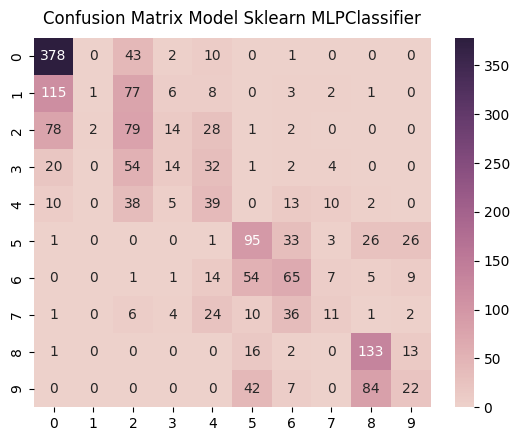

precision    recall  f1-score      support
0.0            0.625828  0.870968  0.728324   434.000000
1.0            0.333333  0.004695  0.009259   213.000000
2.0            0.265101  0.387255  0.314741   204.000000
3.0            0.304348  0.110236  0.161850   127.000000
4.0            0.250000  0.333333  0.285714   117.000000
5.0            0.433790  0.513514  0.470297   185.000000
6.0            0.396341  0.416667  0.406250   156.000000
7.0            0.297297  0.115789  0.166667    95.000000
8.0            0.527778  0.806061  0.637890   165.000000
9.0            0.305556  0.141935  0.193833   155.000000
accuracy       0.452188  0.452188  0.452188     0.452188
macro avg      0.373937  0.370045  0.337482  1851.000000
weighted avg   0.415646  0.452188  0.398576  1851.000000

In [210]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 2ms/step


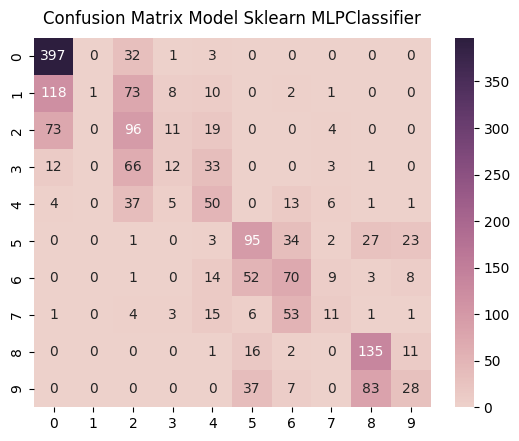

precision    recall  f1-score      support
0.0            0.656198  0.916859  0.764933   433.000000
1.0            1.000000  0.004695  0.009346   213.000000
2.0            0.309677  0.472906  0.374269   203.000000
3.0            0.300000  0.094488  0.143713   127.000000
4.0            0.337838  0.427350  0.377358   117.000000
5.0            0.461165  0.513514  0.485934   185.000000
6.0            0.386740  0.445860  0.414201   157.000000
7.0            0.305556  0.115789  0.167939    95.000000
8.0            0.537849  0.818182  0.649038   165.000000
9.0            0.388889  0.180645  0.246696   155.000000
accuracy       0.483784  0.483784  0.483784     0.483784
macro avg      0.468391  0.399029  0.363343  1850.000000
weighted avg   0.519843  0.483784  0.425836  1850.000000

In [211]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## 32/16/8


#### Developing the MultiLayer Perceptron Model

In [212]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(32, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(16, activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(8, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 2s 4ms/step - loss: 2.2892 - accuracy: 0.1124
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 2.2223 - accuracy: 0.2341
Epoch 3/100
58/58 [==============================] - 0s 4ms/step - loss: 2.1917 - accuracy: 0.2341
Epoch 4/100
58/58 [==============================] - 0s 4ms/step - loss: 2.1609 - accuracy: 0.2341
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 2.1050 - accuracy: 0.2341
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 2.0243 - accuracy: 0.2670
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9400 - accuracy: 0.3092
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8666 - accuracy: 0.3216
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8082 - accuracy: 0.3319
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7640 - accuracy: 0.3335
Epoch 11/

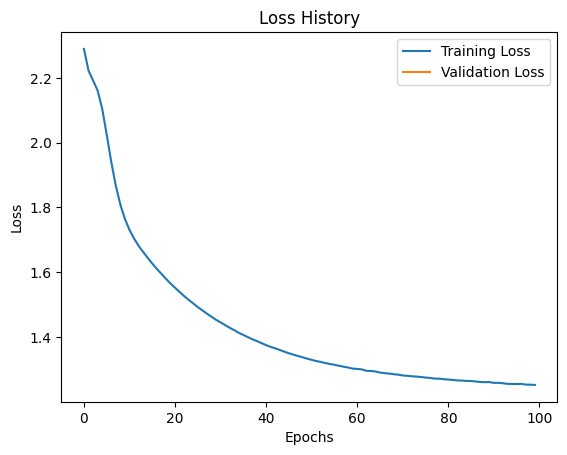

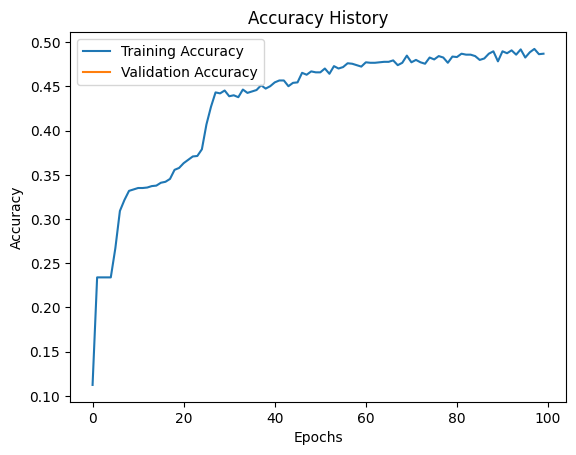

58/58 [==============================] - 0s 2ms/step - loss: 1.2482 - accuracy: 0.4876

Test Accuracy	: 0.4516477584838867
Train Accuracy	: 0.48756757378578186


In [213]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [214]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 2ms/step


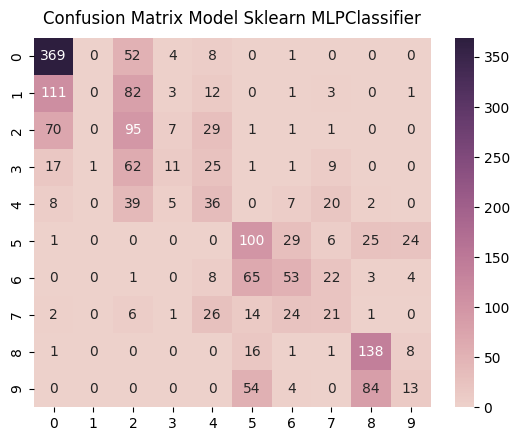

precision    recall  f1-score      support
0.0            0.637306  0.850230  0.728529   434.000000
1.0            0.000000  0.000000  0.000000   213.000000
2.0            0.281899  0.465686  0.351201   204.000000
3.0            0.354839  0.086614  0.139241   127.000000
4.0            0.250000  0.307692  0.275862   117.000000
5.0            0.398406  0.540541  0.458716   185.000000
6.0            0.434426  0.339744  0.381295   156.000000
7.0            0.253012  0.221053  0.235955    95.000000
8.0            0.545455  0.836364  0.660287   165.000000
9.0            0.260000  0.083871  0.126829   155.000000
accuracy       0.451648  0.451648  0.451648     0.451648
macro avg      0.341534  0.373179  0.335792  1851.000000
weighted avg   0.380456  0.451648  0.396084  1851.000000

In [215]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 2ms/step


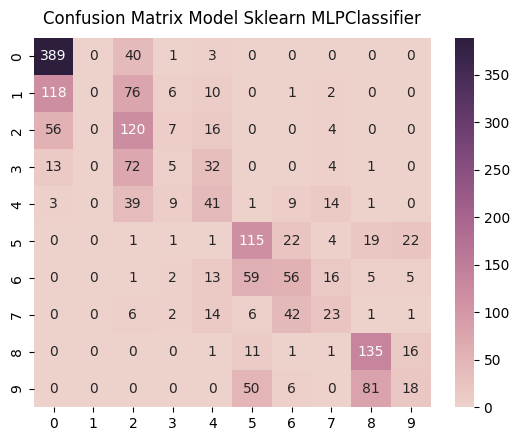

precision    recall  f1-score      support
0.0            0.671848  0.898383  0.768775   433.000000
1.0            0.000000  0.000000  0.000000   213.000000
2.0            0.338028  0.591133  0.430108   203.000000
3.0            0.151515  0.039370  0.062500   127.000000
4.0            0.312977  0.350427  0.330645   117.000000
5.0            0.475207  0.621622  0.538642   185.000000
6.0            0.408759  0.356688  0.380952   157.000000
7.0            0.338235  0.242105  0.282209    95.000000
8.0            0.555556  0.818182  0.661765   165.000000
9.0            0.290323  0.116129  0.165899   155.000000
accuracy       0.487568  0.487568  0.487568     0.487568
macro avg      0.354245  0.403404  0.362149  1850.000000
weighted avg   0.397988  0.487568  0.425939  1850.000000

In [216]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## 16/32/64 (Test Accuracy 0.4635332226753235)

#### Developing the MultiLayer Perceptron Model

In [217]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(16, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 4ms/step - loss: 2.2821 - accuracy: 0.1849
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 2.1913 - accuracy: 0.2341
Epoch 3/100
58/58 [==============================] - 0s 4ms/step - loss: 2.1581 - accuracy: 0.2341
Epoch 4/100
58/58 [==============================] - 0s 4ms/step - loss: 2.0606 - accuracy: 0.2459
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 1.8907 - accuracy: 0.3276
Epoch 6/100
58/58 [==============================] - 0s 4ms/step - loss: 1.7435 - accuracy: 0.3389
Epoch 7/100
58/58 [==============================] - 0s 4ms/step - loss: 1.6631 - accuracy: 0.3389
Epoch 8/100
58/58 [==============================] - 0s 4ms/step - loss: 1.6197 - accuracy: 0.3449
Epoch 9/100
58/58 [==============================] - 0s 4ms/step - loss: 1.5904 - accuracy: 0.3497
Epoch 10/100
58/58 [==============================] - 0s 4ms/step - loss: 1.5689 - accuracy: 0.3497
Epoch 11/

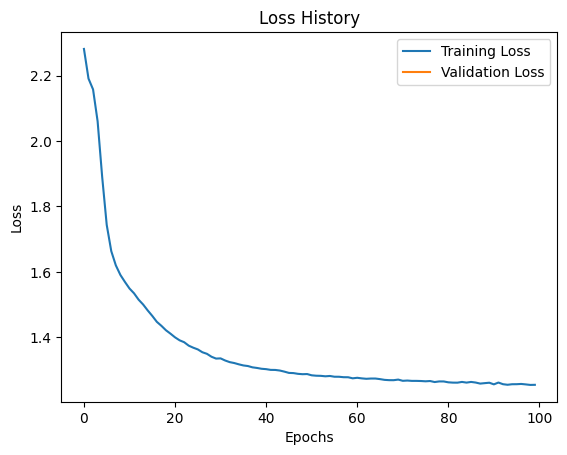

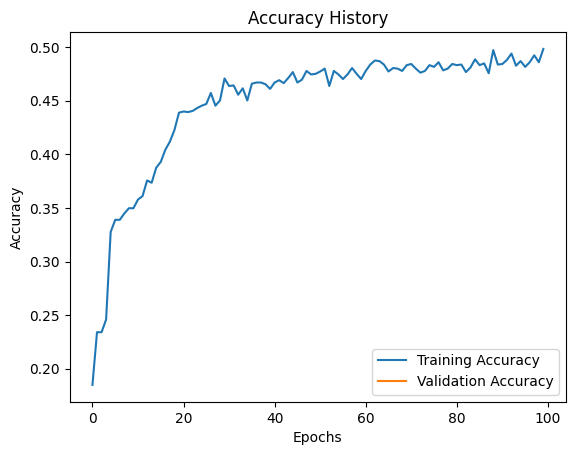

58/58 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4865

Test Accuracy	: 0.4635332226753235
Train Accuracy	: 0.4864864945411682


In [218]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [219]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 2ms/step


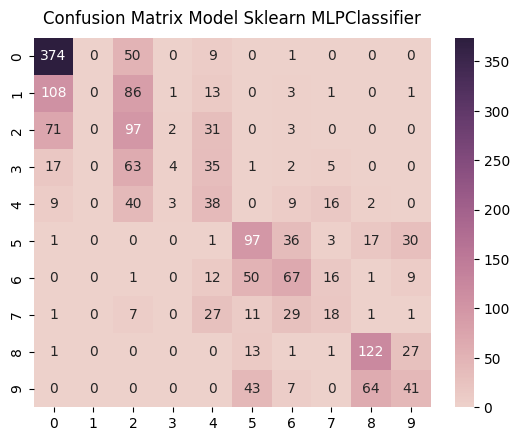

precision    recall  f1-score      support
0.0            0.642612  0.861751  0.736220   434.000000
1.0            0.000000  0.000000  0.000000   213.000000
2.0            0.281977  0.475490  0.354015   204.000000
3.0            0.400000  0.031496  0.058394   127.000000
4.0            0.228916  0.324786  0.268551   117.000000
5.0            0.451163  0.524324  0.485000   185.000000
6.0            0.424051  0.429487  0.426752   156.000000
7.0            0.300000  0.189474  0.232258    95.000000
8.0            0.589372  0.739394  0.655914   165.000000
9.0            0.376147  0.264516  0.310606   155.000000
accuracy       0.463533  0.463533  0.463533     0.463533
macro avg      0.369424  0.384072  0.352771  1851.000000
weighted avg   0.403925  0.463533  0.413456  1851.000000

In [220]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 2ms/step


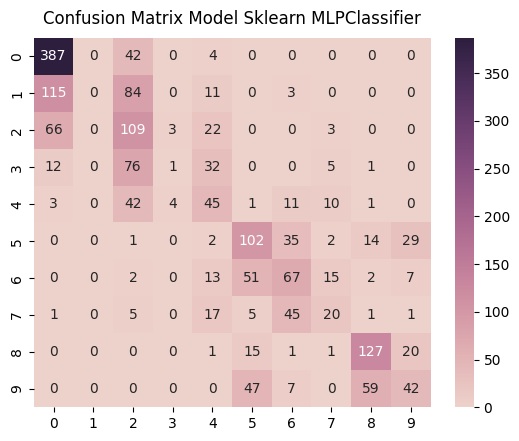

precision    recall  f1-score      support
0.0            0.662671  0.893764  0.761062   433.000000
1.0            0.000000  0.000000  0.000000   213.000000
2.0            0.301939  0.536946  0.386525   203.000000
3.0            0.125000  0.007874  0.014815   127.000000
4.0            0.306122  0.384615  0.340909   117.000000
5.0            0.461538  0.551351  0.502463   185.000000
6.0            0.396450  0.426752  0.411043   157.000000
7.0            0.357143  0.210526  0.264901    95.000000
8.0            0.619512  0.769697  0.686486   165.000000
9.0            0.424242  0.270968  0.330709   155.000000
accuracy       0.486486  0.486486  0.486486     0.486486
macro avg      0.365462  0.405249  0.369891  1850.000000
weighted avg   0.405111  0.486486  0.430788  1850.000000

In [221]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## 64/32/16


#### Developing the MultiLayer Perceptron Model

In [222]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(64, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(16, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.2549 - accuracy: 0.2022
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1802 - accuracy: 0.2341
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1056 - accuracy: 0.2389
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9653 - accuracy: 0.3059
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8351 - accuracy: 0.3297
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7485 - accuracy: 0.3384
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6917 - accuracy: 0.3378
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6528 - accuracy: 0.3422
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6213 - accuracy: 0.3600
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5938 - accuracy: 0.3508
Epoch 11/

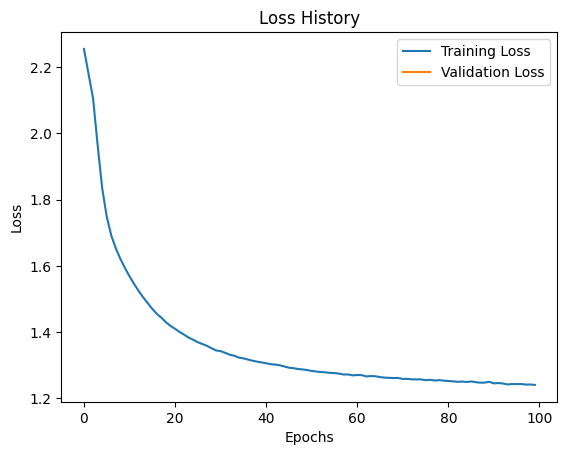

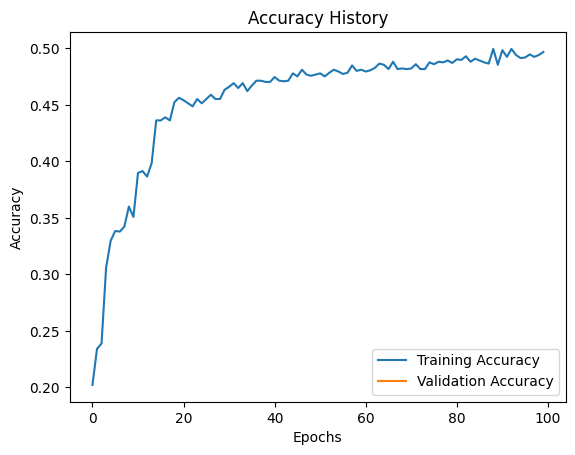

58/58 [==============================] - 0s 3ms/step - loss: 1.2347 - accuracy: 0.5000

Test Accuracy	: 0.4511075019836426
Train Accuracy	: 0.5


In [223]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [224]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


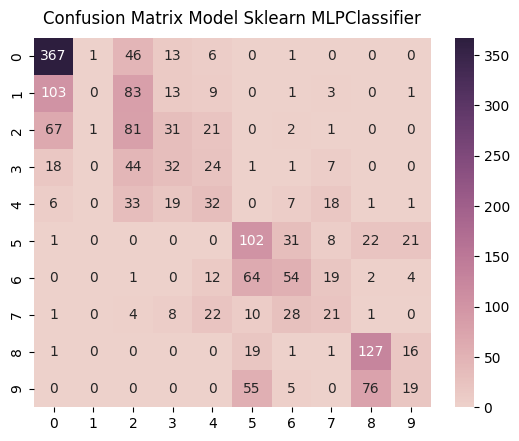

precision    recall  f1-score      support
0.0            0.650709  0.845622  0.735471   434.000000
1.0            0.000000  0.000000  0.000000   213.000000
2.0            0.277397  0.397059  0.326613   204.000000
3.0            0.275862  0.251969  0.263374   127.000000
4.0            0.253968  0.273504  0.263374   117.000000
5.0            0.406375  0.551351  0.467890   185.000000
6.0            0.412214  0.346154  0.376307   156.000000
7.0            0.269231  0.221053  0.242775    95.000000
8.0            0.554585  0.769697  0.644670   165.000000
9.0            0.306452  0.122581  0.175115   155.000000
accuracy       0.451108  0.451108  0.451108     0.451108
macro avg      0.340679  0.377899  0.349559  1851.000000
weighted avg   0.382395  0.451108  0.406228  1851.000000

In [225]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 1ms/step


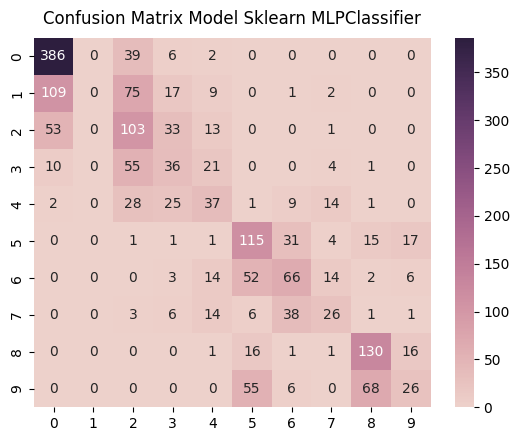

precision    recall  f1-score  support
0.0            0.689286  0.891455  0.777442    433.0
1.0            0.000000  0.000000  0.000000    213.0
2.0            0.338816  0.507389  0.406312    203.0
3.0            0.283465  0.283465  0.283465    127.0
4.0            0.330357  0.316239  0.323144    117.0
5.0            0.469388  0.621622  0.534884    185.0
6.0            0.434211  0.420382  0.427184    157.0
7.0            0.393939  0.273684  0.322981     95.0
8.0            0.596330  0.787879  0.678851    165.0
9.0            0.393939  0.167742  0.235294    155.0
accuracy       0.500000  0.500000  0.500000      0.5
macro avg      0.392973  0.426986  0.398956   1850.0
weighted avg   0.429070  0.500000  0.453031   1850.0

In [226]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## 8/64/128


#### Developing the MultiLayer Perceptron Model

In [227]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(8, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(128, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.2198 - accuracy: 0.2227
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1933 - accuracy: 0.2341
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1370 - accuracy: 0.2341
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9683 - accuracy: 0.2957
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7587 - accuracy: 0.3362
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6457 - accuracy: 0.3476
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5981 - accuracy: 0.3514
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5651 - accuracy: 0.3519
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5386 - accuracy: 0.3551
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5178 - accuracy: 0.3778
Epoch 11/

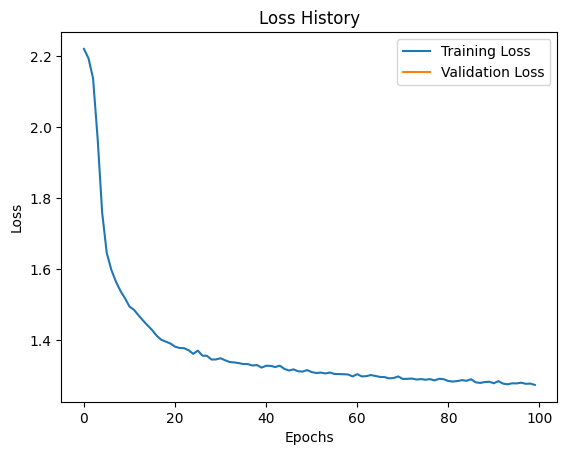

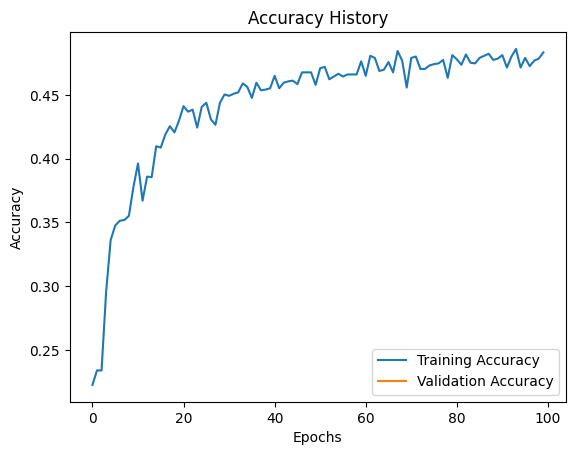

58/58 [==============================] - 0s 3ms/step - loss: 1.2676 - accuracy: 0.4870

Test Accuracy	: 0.4597514867782593
Train Accuracy	: 0.48702701926231384


In [228]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [229]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 2ms/step


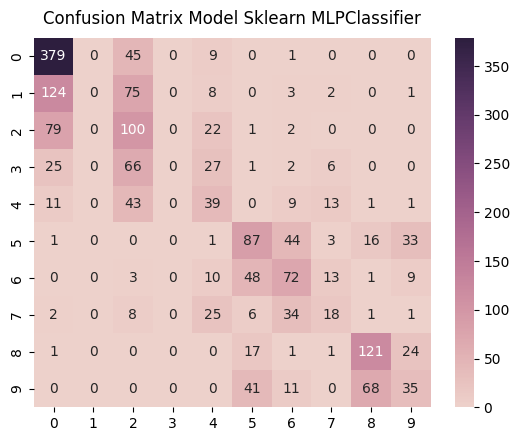

precision    recall  f1-score      support
0.0            0.609325  0.873272  0.717803   434.000000
1.0            0.000000  0.000000  0.000000   213.000000
2.0            0.294118  0.490196  0.367647   204.000000
3.0            0.000000  0.000000  0.000000   127.000000
4.0            0.276596  0.333333  0.302326   117.000000
5.0            0.432836  0.470270  0.450777   185.000000
6.0            0.402235  0.461538  0.429851   156.000000
7.0            0.321429  0.189474  0.238411    95.000000
8.0            0.581731  0.733333  0.648794   165.000000
9.0            0.336538  0.225806  0.270270   155.000000
accuracy       0.459751  0.459751  0.459751     0.459751
macro avg      0.325481  0.377722  0.342588  1851.000000
weighted avg   0.366460  0.459751  0.401913  1851.000000

In [230]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 2ms/step


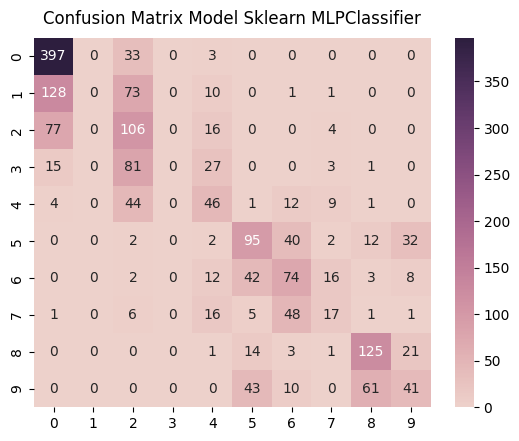

precision    recall  f1-score      support
0.0            0.638264  0.916859  0.752607   433.000000
1.0            0.000000  0.000000  0.000000   213.000000
2.0            0.305476  0.522167  0.385455   203.000000
3.0            0.000000  0.000000  0.000000   127.000000
4.0            0.345865  0.393162  0.368000   117.000000
5.0            0.475000  0.513514  0.493506   185.000000
6.0            0.393617  0.471338  0.428986   157.000000
7.0            0.320755  0.178947  0.229730    95.000000
8.0            0.612745  0.757576  0.677507   165.000000
9.0            0.398058  0.264516  0.317829   155.000000
accuracy       0.487027  0.487027  0.487027     0.487027
macro avg      0.348978  0.401808  0.365362  1850.000000
weighted avg   0.390158  0.487027  0.426329  1850.000000

In [231]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## 128/64/8


#### Developing the MultiLayer Perceptron Model

In [232]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(8, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.2469 - accuracy: 0.1854
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1858 - accuracy: 0.2341
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 2.0894 - accuracy: 0.2973
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9435 - accuracy: 0.3292
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8350 - accuracy: 0.3195
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7648 - accuracy: 0.3308
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7137 - accuracy: 0.3373
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6743 - accuracy: 0.3416
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6414 - accuracy: 0.3832
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6125 - accuracy: 0.3984
Epoch 11/

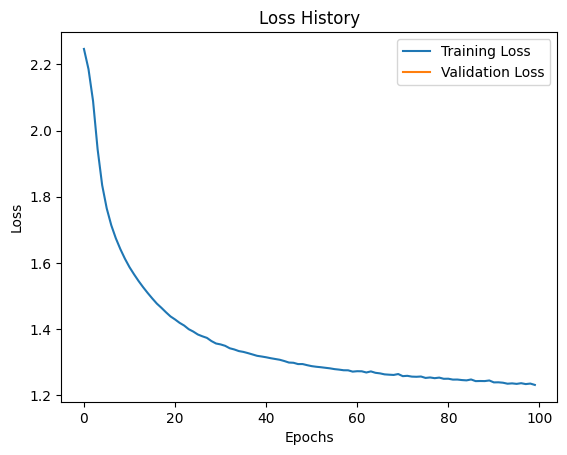

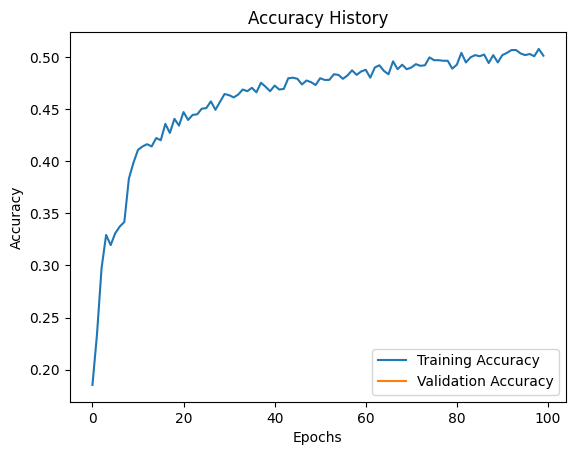

58/58 [==============================] - 0s 2ms/step - loss: 1.2233 - accuracy: 0.5054

Test Accuracy	: 0.4602917432785034
Train Accuracy	: 0.5054054260253906


In [233]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [234]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


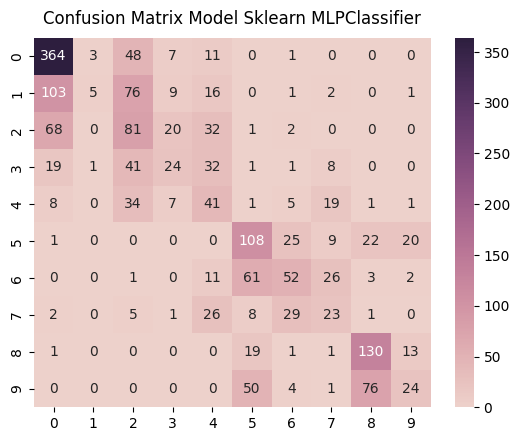

precision    recall  f1-score      support
0.0            0.643110  0.838710  0.728000   434.000000
1.0            0.555556  0.023474  0.045045   213.000000
2.0            0.283217  0.397059  0.330612   204.000000
3.0            0.352941  0.188976  0.246154   127.000000
4.0            0.242604  0.350427  0.286713   117.000000
5.0            0.433735  0.583784  0.497696   185.000000
6.0            0.429752  0.333333  0.375451   156.000000
7.0            0.258427  0.242105  0.250000    95.000000
8.0            0.557940  0.787879  0.653266   165.000000
9.0            0.393443  0.154839  0.222222   155.000000
accuracy       0.460292  0.460292  0.460292     0.460292
macro avg      0.415072  0.390059  0.363516  1851.000000
weighted avg   0.460996  0.460292  0.418382  1851.000000

In [235]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 2ms/step


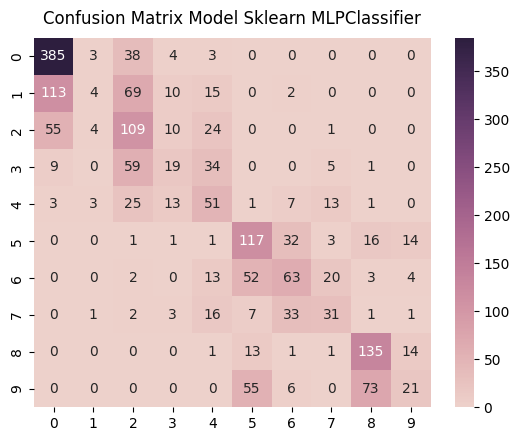

precision    recall  f1-score      support
0.0            0.681416  0.889145  0.771543   433.000000
1.0            0.266667  0.018779  0.035088   213.000000
2.0            0.357377  0.536946  0.429134   203.000000
3.0            0.316667  0.149606  0.203209   127.000000
4.0            0.322785  0.435897  0.370909   117.000000
5.0            0.477551  0.632432  0.544186   185.000000
6.0            0.437500  0.401274  0.418605   157.000000
7.0            0.418919  0.326316  0.366864    95.000000
8.0            0.586957  0.818182  0.683544   165.000000
9.0            0.388889  0.135484  0.200957   155.000000
accuracy       0.505405  0.505405  0.505405     0.505405
macro avg      0.425473  0.434406  0.402404  1850.000000
weighted avg   0.462887  0.505405  0.455703  1850.000000

In [236]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## 16/8/32


#### Developing the MultiLayer Perceptron Model

In [237]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(16, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(8, activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.2813 - accuracy: 0.2189
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.2035 - accuracy: 0.2341
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1879 - accuracy: 0.2341
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1538 - accuracy: 0.2341
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 2.0888 - accuracy: 0.2341
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9980 - accuracy: 0.2995
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9019 - accuracy: 0.3232
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8202 - accuracy: 0.3319
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7577 - accuracy: 0.3324
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7135 - accuracy: 0.3330
Epoch 11/

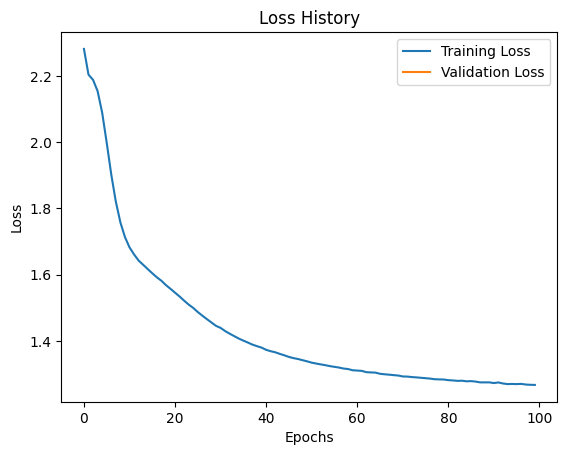

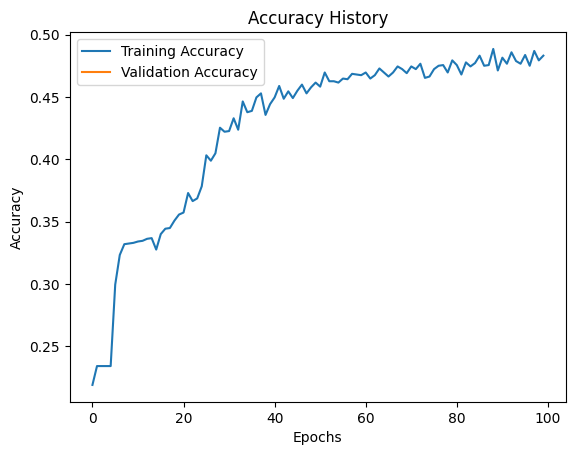

58/58 [==============================] - 0s 2ms/step - loss: 1.2618 - accuracy: 0.4849

Test Accuracy	: 0.4500270187854767
Train Accuracy	: 0.48486486077308655


In [238]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [239]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


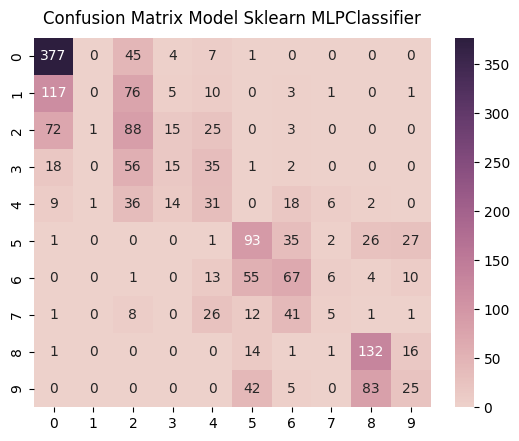

precision    recall  f1-score      support
0.0            0.632550  0.868664  0.732039   434.000000
1.0            0.000000  0.000000  0.000000   213.000000
2.0            0.283871  0.431373  0.342412   204.000000
3.0            0.283019  0.118110  0.166667   127.000000
4.0            0.209459  0.264957  0.233962   117.000000
5.0            0.426606  0.502703  0.461538   185.000000
6.0            0.382857  0.429487  0.404834   156.000000
7.0            0.238095  0.052632  0.086207    95.000000
8.0            0.532258  0.800000  0.639225   165.000000
9.0            0.312500  0.161290  0.212766   155.000000
accuracy       0.450027  0.450027  0.450027     0.450027
macro avg      0.330122  0.362922  0.327965  1851.000000
weighted avg   0.372995  0.450027  0.395071  1851.000000

In [240]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 2ms/step


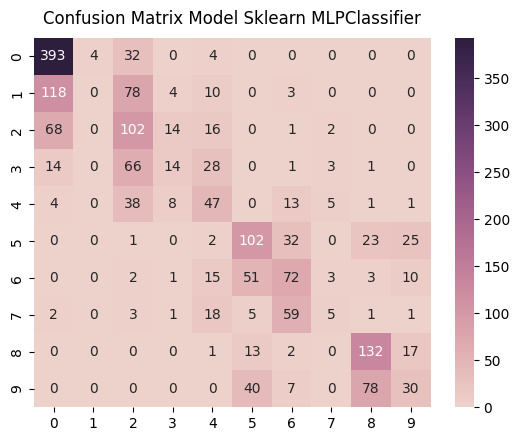

precision    recall  f1-score      support
0.0            0.656093  0.907621  0.761628   433.000000
1.0            0.000000  0.000000  0.000000   213.000000
2.0            0.316770  0.502463  0.388571   203.000000
3.0            0.333333  0.110236  0.165680   127.000000
4.0            0.333333  0.401709  0.364341   117.000000
5.0            0.483412  0.551351  0.515152   185.000000
6.0            0.378947  0.458599  0.414986   157.000000
7.0            0.277778  0.052632  0.088496    95.000000
8.0            0.552301  0.800000  0.653465   165.000000
9.0            0.357143  0.193548  0.251046   155.000000
accuracy       0.484865  0.484865  0.484865     0.484865
macro avg      0.368911  0.397816  0.360336  1850.000000
weighted avg   0.406231  0.484865  0.425909  1850.000000

In [241]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## 32/8/16


#### Developing the MultiLayer Perceptron Model

In [242]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(32, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(8, activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(16, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 2s 5ms/step - loss: 2.2976 - accuracy: 0.1562
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 2.2055 - accuracy: 0.2341
Epoch 3/100
58/58 [==============================] - 0s 4ms/step - loss: 2.1731 - accuracy: 0.2341
Epoch 4/100
58/58 [==============================] - 0s 5ms/step - loss: 2.1282 - accuracy: 0.2341
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 2.0598 - accuracy: 0.2357
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9793 - accuracy: 0.3032
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9017 - accuracy: 0.3168
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8346 - accuracy: 0.3173
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7799 - accuracy: 0.3178
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7379 - accuracy: 0.3178
Epoch 11/

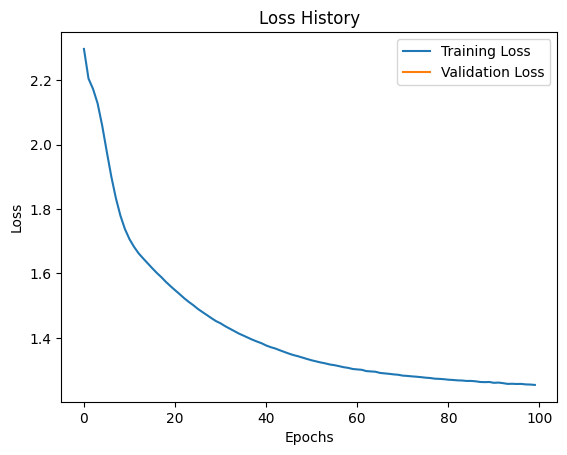

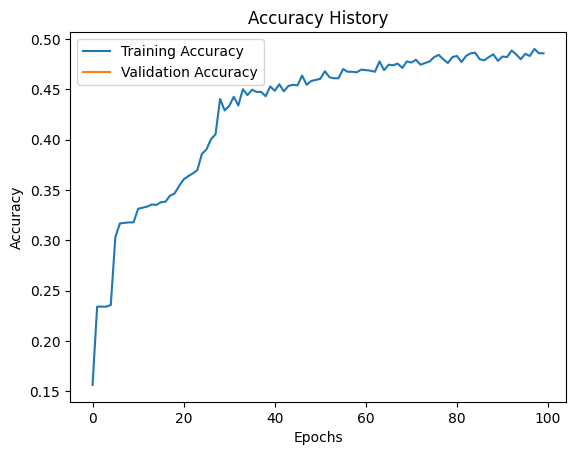

58/58 [==============================] - 0s 2ms/step - loss: 1.2496 - accuracy: 0.4859

Test Accuracy	: 0.4575904905796051
Train Accuracy	: 0.4859459400177002


In [243]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [244]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


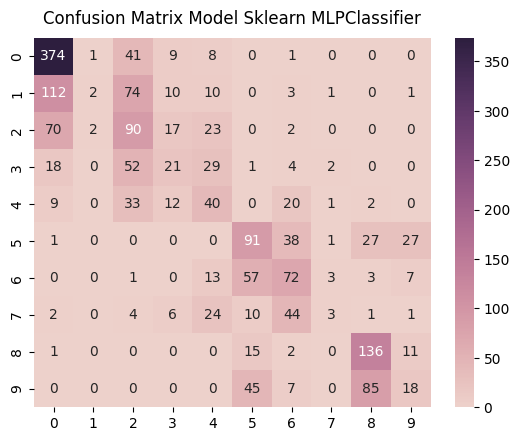

precision    recall  f1-score     support
0.0            0.637138  0.861751  0.732615   434.00000
1.0            0.400000  0.009390  0.018349   213.00000
2.0            0.305085  0.441176  0.360721   204.00000
3.0            0.280000  0.165354  0.207921   127.00000
4.0            0.272109  0.341880  0.303030   117.00000
5.0            0.415525  0.491892  0.450495   185.00000
6.0            0.373057  0.461538  0.412607   156.00000
7.0            0.272727  0.031579  0.056604    95.00000
8.0            0.535433  0.824242  0.649165   165.00000
9.0            0.276923  0.116129  0.163636   155.00000
accuracy       0.457590  0.457590  0.457590     0.45759
macro avg      0.376800  0.374493  0.335514  1851.00000
weighted avg   0.423339  0.457590  0.401336  1851.00000

In [245]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 1ms/step


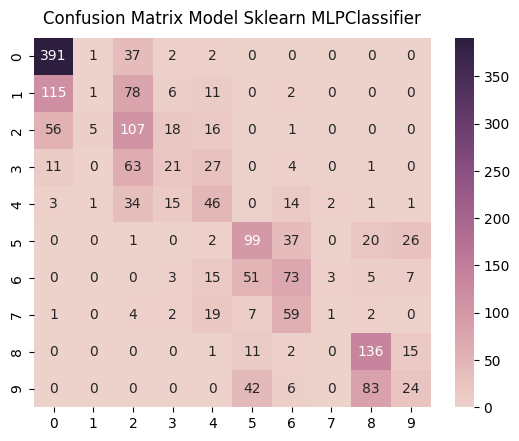

precision    recall  f1-score      support
0.0            0.677643  0.903002  0.774257   433.000000
1.0            0.125000  0.004695  0.009050   213.000000
2.0            0.330247  0.527094  0.406072   203.000000
3.0            0.313433  0.165354  0.216495   127.000000
4.0            0.330935  0.393162  0.359375   117.000000
5.0            0.471429  0.535135  0.501266   185.000000
6.0            0.368687  0.464968  0.411268   157.000000
7.0            0.166667  0.010526  0.019802    95.000000
8.0            0.548387  0.824242  0.658596   165.000000
9.0            0.328767  0.154839  0.210526   155.000000
accuracy       0.485946  0.485946  0.485946     0.485946
macro avg      0.366119  0.398302  0.356671  1850.000000
weighted avg   0.415127  0.485946  0.426832  1850.000000

In [246]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## 64/16/8


#### Developing the MultiLayer Perceptron Model

In [247]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(64, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(16, activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(8, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.2868 - accuracy: 0.1205
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.2164 - accuracy: 0.2341
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1744 - accuracy: 0.2341
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1081 - accuracy: 0.2341
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 2.0154 - accuracy: 0.3065
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9250 - accuracy: 0.3308
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.8496 - accuracy: 0.3319
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7916 - accuracy: 0.3324
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7476 - accuracy: 0.3351
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7134 - accuracy: 0.3368
Epoch 11/

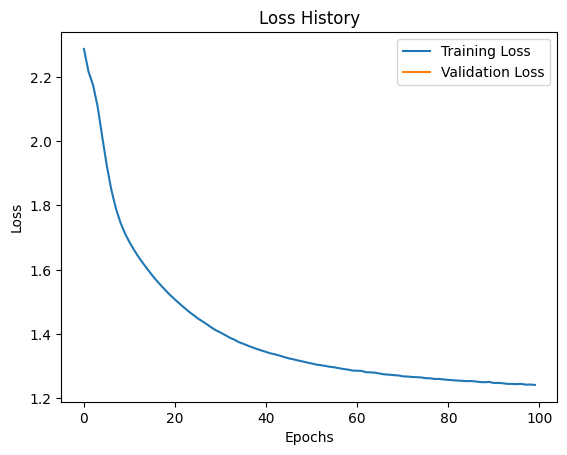

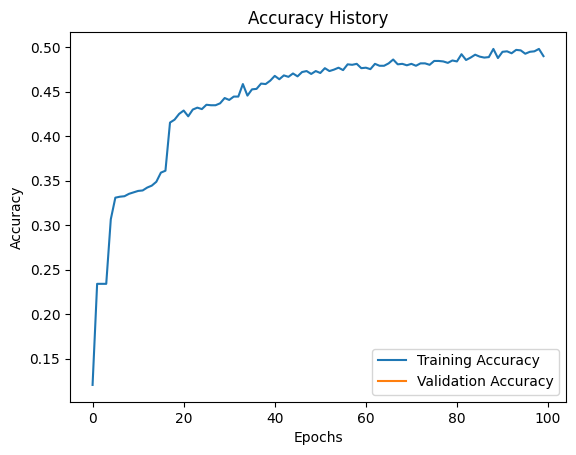

58/58 [==============================] - 0s 3ms/step - loss: 1.2379 - accuracy: 0.4978

Test Accuracy	: 0.45218801498413086
Train Accuracy	: 0.4978378415107727


In [248]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [249]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 2ms/step


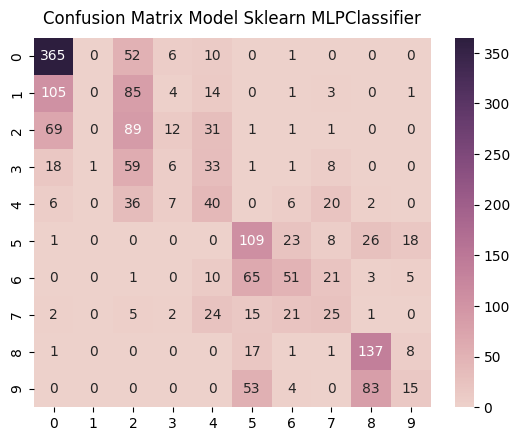

precision    recall  f1-score      support
0.0            0.643739  0.841014  0.729271   434.000000
1.0            0.000000  0.000000  0.000000   213.000000
2.0            0.272171  0.436275  0.335217   204.000000
3.0            0.162162  0.047244  0.073171   127.000000
4.0            0.246914  0.341880  0.286738   117.000000
5.0            0.417625  0.589189  0.488789   185.000000
6.0            0.463636  0.326923  0.383459   156.000000
7.0            0.287356  0.263158  0.274725    95.000000
8.0            0.543651  0.830303  0.657074   165.000000
9.0            0.319149  0.096774  0.148515   155.000000
accuracy       0.452188  0.452188  0.452188     0.452188
macro avg      0.335640  0.377276  0.337696  1851.000000
weighted avg   0.378415  0.452188  0.397358  1851.000000

In [250]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 2ms/step


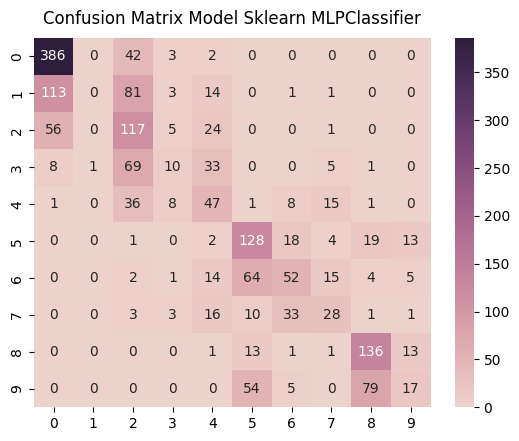

precision    recall  f1-score      support
0.0            0.684397  0.891455  0.774323   433.000000
1.0            0.000000  0.000000  0.000000   213.000000
2.0            0.333333  0.576355  0.422383   203.000000
3.0            0.303030  0.078740  0.125000   127.000000
4.0            0.307190  0.401709  0.348148   117.000000
5.0            0.474074  0.691892  0.562637   185.000000
6.0            0.440678  0.331210  0.378182   157.000000
7.0            0.400000  0.294737  0.339394    95.000000
8.0            0.564315  0.824242  0.669951   165.000000
9.0            0.346939  0.109677  0.166667   155.000000
accuracy       0.497838  0.497838  0.497838     0.497838
macro avg      0.385396  0.420002  0.378668  1850.000000
weighted avg   0.421737  0.497838  0.437683  1850.000000

In [251]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

## 128/32/16 (Train Accuracy 0.5162162184715271)

#### Developing the MultiLayer Perceptron Model

In [252]:
import tensorflow as tf

class MLPClassifier:
    def __init__(self, input_shape, label_class, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.label_class = label_class
        self.activation_function = activation_function
        tf.keras.utils.set_random_seed(42)

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function))
        self.model.add(tf.keras.layers.Dense(16, activation=self.activation_function))

        # self.model.add(tf.keras.layers.Dense(128, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(64, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))
        # self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        # self.model.add(tf.keras.layers.BatchNormalization())
        # self.model.add(tf.keras.layers.Dropout(0.5))

        self.model.add(tf.keras.layers.Dense(self.label_class, activation=self.activation_function))

        # Compile the model
        # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
        # self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.learning_rate = learning_rate
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        # if x_val is not None and y_val is not None:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        # else:
        #     history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[callback] if callback is not None else [])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback] if callback is not None else [])

        return history


    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]


    def summary(self):
        self.model.summary()

    def set_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=1)

    def summary(self):
        self.model.summary()

Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 2.2499 - accuracy: 0.2032
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 2.1745 - accuracy: 0.2341
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 2.0640 - accuracy: 0.2730
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 1.9123 - accuracy: 0.3205
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7984 - accuracy: 0.3351
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 1.7239 - accuracy: 0.3368
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6719 - accuracy: 0.3519
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 1.6326 - accuracy: 0.3714
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5988 - accuracy: 0.4016
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss: 1.5691 - accuracy: 0.3995
Epoch 11/

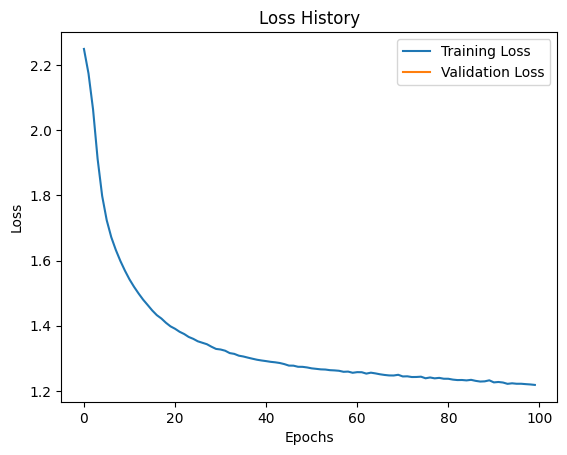

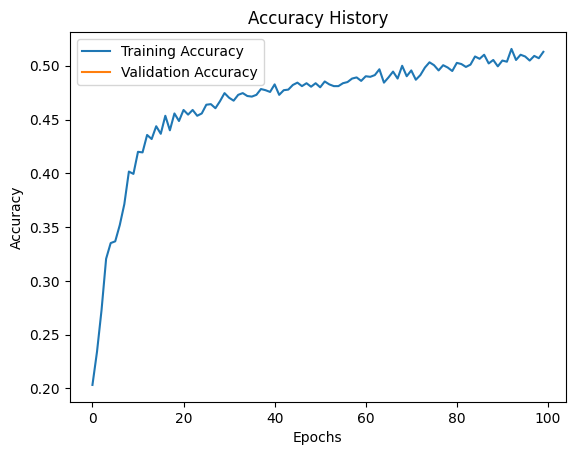

58/58 [==============================] - 0s 2ms/step - loss: 1.2098 - accuracy: 0.5162

Test Accuracy	: 0.45705023407936096
Train Accuracy	: 0.5162162184715271


In [253]:
model = MLPClassifier(x_train.shape[1], label.unique().shape[0], learning_rate=0.001, activation_function='sigmoid')

history = model.set_history()
model.train(x_train, y_train, epochs=100, callback=history, batch_size=32)

model.plot_loss_history(history.losses, history.val_losses)
model.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {model.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {model.get_accuracy(x_train, y_train)}')

#### Classification Report

In [ ]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

**Test Predictions**

58/58 [==============================] - 0s 1ms/step


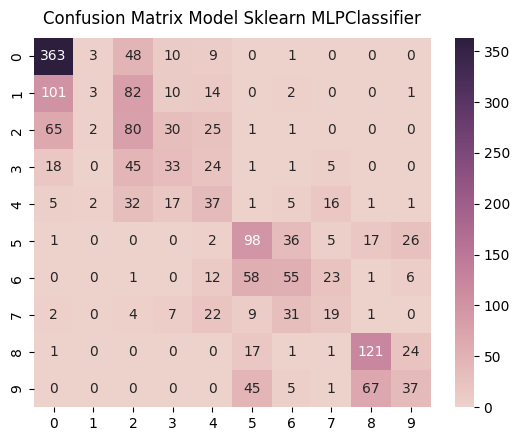

precision    recall  f1-score     support
0.0            0.652878  0.836406  0.733333   434.00000
1.0            0.300000  0.014085  0.026906   213.00000
2.0            0.273973  0.392157  0.322581   204.00000
3.0            0.308411  0.259843  0.282051   127.00000
4.0            0.255172  0.316239  0.282443   117.00000
5.0            0.426087  0.529730  0.472289   185.00000
6.0            0.398551  0.352564  0.374150   156.00000
7.0            0.271429  0.200000  0.230303    95.00000
8.0            0.581731  0.733333  0.648794   165.00000
9.0            0.389474  0.238710  0.296000   155.00000
accuracy       0.457050  0.457050  0.457050     0.45705
macro avg      0.385770  0.387307  0.366885  1851.00000
weighted avg   0.429661  0.457050  0.420973  1851.00000

In [254]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_test)

confusion_matrix_result = confusion_matrix(y_test, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_test, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()

**Train Predictions**

58/58 [==============================] - 0s 2ms/step


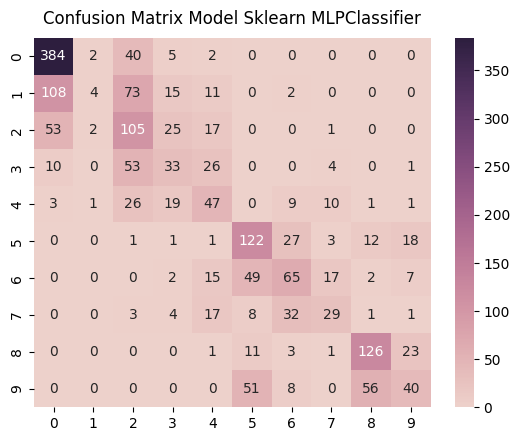

precision    recall  f1-score      support
0.0            0.688172  0.886836  0.774975   433.000000
1.0            0.444444  0.018779  0.036036   213.000000
2.0            0.348837  0.517241  0.416667   203.000000
3.0            0.317308  0.259843  0.285714   127.000000
4.0            0.343066  0.401709  0.370079   117.000000
5.0            0.506224  0.659459  0.572770   185.000000
6.0            0.445205  0.414013  0.429043   157.000000
7.0            0.446154  0.305263  0.362500    95.000000
8.0            0.636364  0.763636  0.694215   165.000000
9.0            0.439560  0.258065  0.325203   155.000000
accuracy       0.516216  0.516216  0.516216     0.516216
macro avg      0.461533  0.448484  0.426720  1850.000000
weighted avg   0.498898  0.516216  0.475740  1850.000000

In [255]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True, zero_division=0)
pd.DataFrame(model_report).transpose()